## Project - Unsupervised Learning

### Part 1 - Automobile

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Import and warehouse data

In [15]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, accuracy_score, f1_score, precision_score ,recall_score, roc_auc_score
from sklearn.cluster import AgglomerativeClustering 
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
%matplotlib inline
sns.set(style="darkgrid")

In [5]:
car_name=pd.read_csv('Part1 - Car name.csv')

In [6]:
car_name.head(10)

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino
5           ford galaxie 500
6           chevrolet impala
7          plymouth fury iii
8           pontiac catalina
9         amc ambassador dpl

In [7]:
car_name.shape

(398, 1)

In [8]:
car_att=pd.read_json('Part1 - Car-Attributes.json')

In [9]:
car_att.head(10)

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1
5  15.0    8  429.0  198  4341  10.0  70       1
6  14.0    8  454.0  220  4354   9.0  70       1
7  14.0    8  440.0  215  4312   8.5  70       1
8  14.0    8  455.0  225  4425  10.0  70       1
9  15.0    8  390.0  190  3850   8.5  70       1

In [10]:
car_att.shape

(398, 8)

In [11]:
finaldf=pd.concat([car_name, car_att], axis=1, join="inner")

In [12]:
finaldf.head(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
5           ford galaxie 500  15.0    8  429.0  198  4341  10.0  70       1
6           chevrolet impala  14.0    8  454.0  220  4354   9.0  70       1
7          plymouth fury iii  14.0    8  440.0  215  4312   8.5  70       1
8           pontiac catalina  14.0    8  455.0  225  4425  10.0  70       1
9         amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70       1

In [13]:
finaldf.shape

(398, 9)

In [14]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
#Exporting final dataset 
finaldf.to_csv(r'final_cardata.csv', index = False, header=True)
finaldf.to_excel(r'final_cardata.xlsx', index = False, header=True)
finaldf.to_json(r'final_cardata.json')

In [16]:
#importing final df
cardf=pd.read_csv('final_cardata.csv')

In [17]:
cardf.head(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
5           ford galaxie 500  15.0    8  429.0  198  4341  10.0  70       1
6           chevrolet impala  14.0    8  454.0  220  4354   9.0  70       1
7          plymouth fury iii  14.0    8  440.0  215  4312   8.5  70       1
8           pontiac catalina  14.0    8  455.0  225  4425  10.0  70       1
9         amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70       1

In [18]:
cardf.shape

(398, 9)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Data Cleansing

In [19]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [20]:
#Converting datatype of hp to numeric
cardf['hp'] = pd.to_numeric(cardf['hp'], errors='coerce')

In [21]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [22]:
#Checking missing values
cardf.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [23]:
cardf[cardf['hp'].isnull()]

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

In [24]:
#Replacing Null values for hp column with average
cardf['hp'].fillna((cardf['hp'].mean()), inplace=True)

In [25]:
#confirming null values have been fixed
cardf.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [26]:
#Confirming that 'origin' is categorical column
cardf['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [27]:
cardf['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [28]:
#Dropping car_name and origin columns as these are string and categorical columns respectively, 
#and for our clustering alogorithms, we would like to work with numerical attributes
cardfAttr=cardf.drop(['car_name','origin'],axis=1)

In [29]:
cardfAttr.head(10)

mpg  cyl   disp     hp    wt   acc  yr
0  18.0    8  307.0  130.0  3504  12.0  70
1  15.0    8  350.0  165.0  3693  11.5  70
2  18.0    8  318.0  150.0  3436  11.0  70
3  16.0    8  304.0  150.0  3433  12.0  70
4  17.0    8  302.0  140.0  3449  10.5  70
5  15.0    8  429.0  198.0  4341  10.0  70
6  14.0    8  454.0  220.0  4354   9.0  70
7  14.0    8  440.0  215.0  4312   8.5  70
8  14.0    8  455.0  225.0  4425  10.0  70
9  15.0    8  390.0  190.0  3850   8.5  70

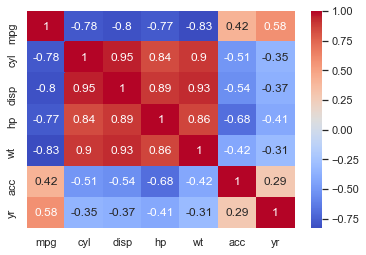

In [30]:
#Let us use correlation matrix to see if there are features which are highly correlated
#Plotting heatmap for correlation
sns.heatmap(cardfAttr.corr(),cmap='coolwarm',annot=True)
plt.show()

Rather than dropping highly correlated features, we will later use PCA technique to combine features

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Data analysis & visualisation

<b> Univariate Analysis

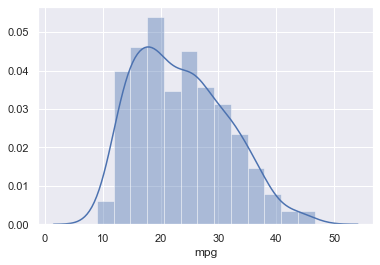

In [31]:
sns.distplot(cardfAttr['mpg'])

mpg is not normally distributed, with no outliers

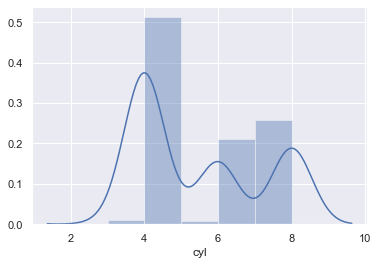

In [32]:
sns.distplot(cardfAttr['cyl'])

'Cylinder' variable is not normally distributed with multiple modals

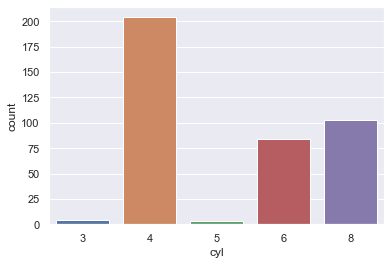

In [33]:
sns.countplot(x='cyl',data=cardfAttr)
plt.show()

Most cars in the given dataset have 4 cyclinders

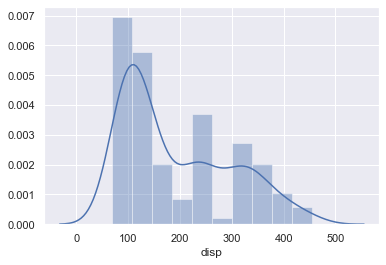

In [34]:
sns.distplot(cardfAttr['disp'])

'displacement' is not normally distribute and is unimodal

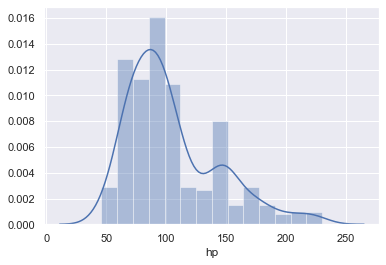

In [35]:
sns.distplot(cardfAttr['hp'])

'horsepower' is not normally distributed and is bimodal

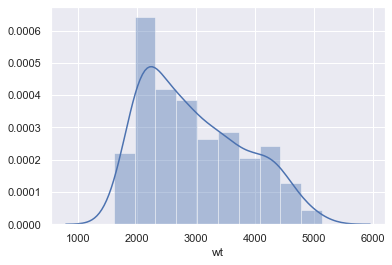

In [36]:
sns.distplot(cardfAttr['wt'])

'weight' is not normally distributed and has 1 peak

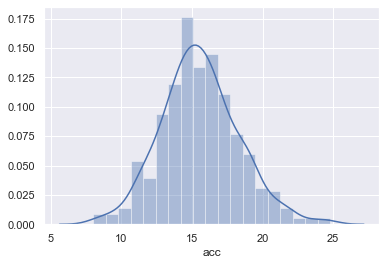

In [37]:
sns.distplot(cardfAttr['acc'])

'acceleration' is normally distributed

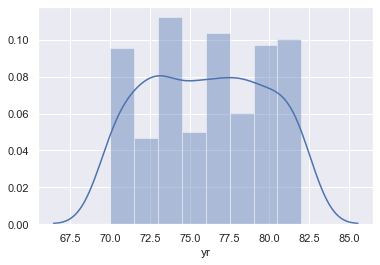

In [38]:
sns.distplot(cardfAttr['yr'])

model year is normally distributed

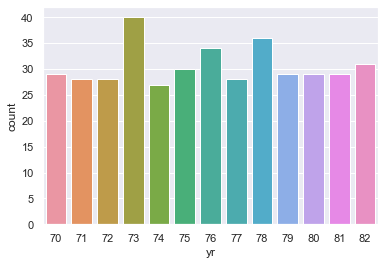

In [39]:
sns.countplot(x='yr',data=cardfAttr)
plt.show()

Above graph shows a distribution of cars based on different model year. As seen, most car belong to 1973 model year

<b> Bivariate analysis

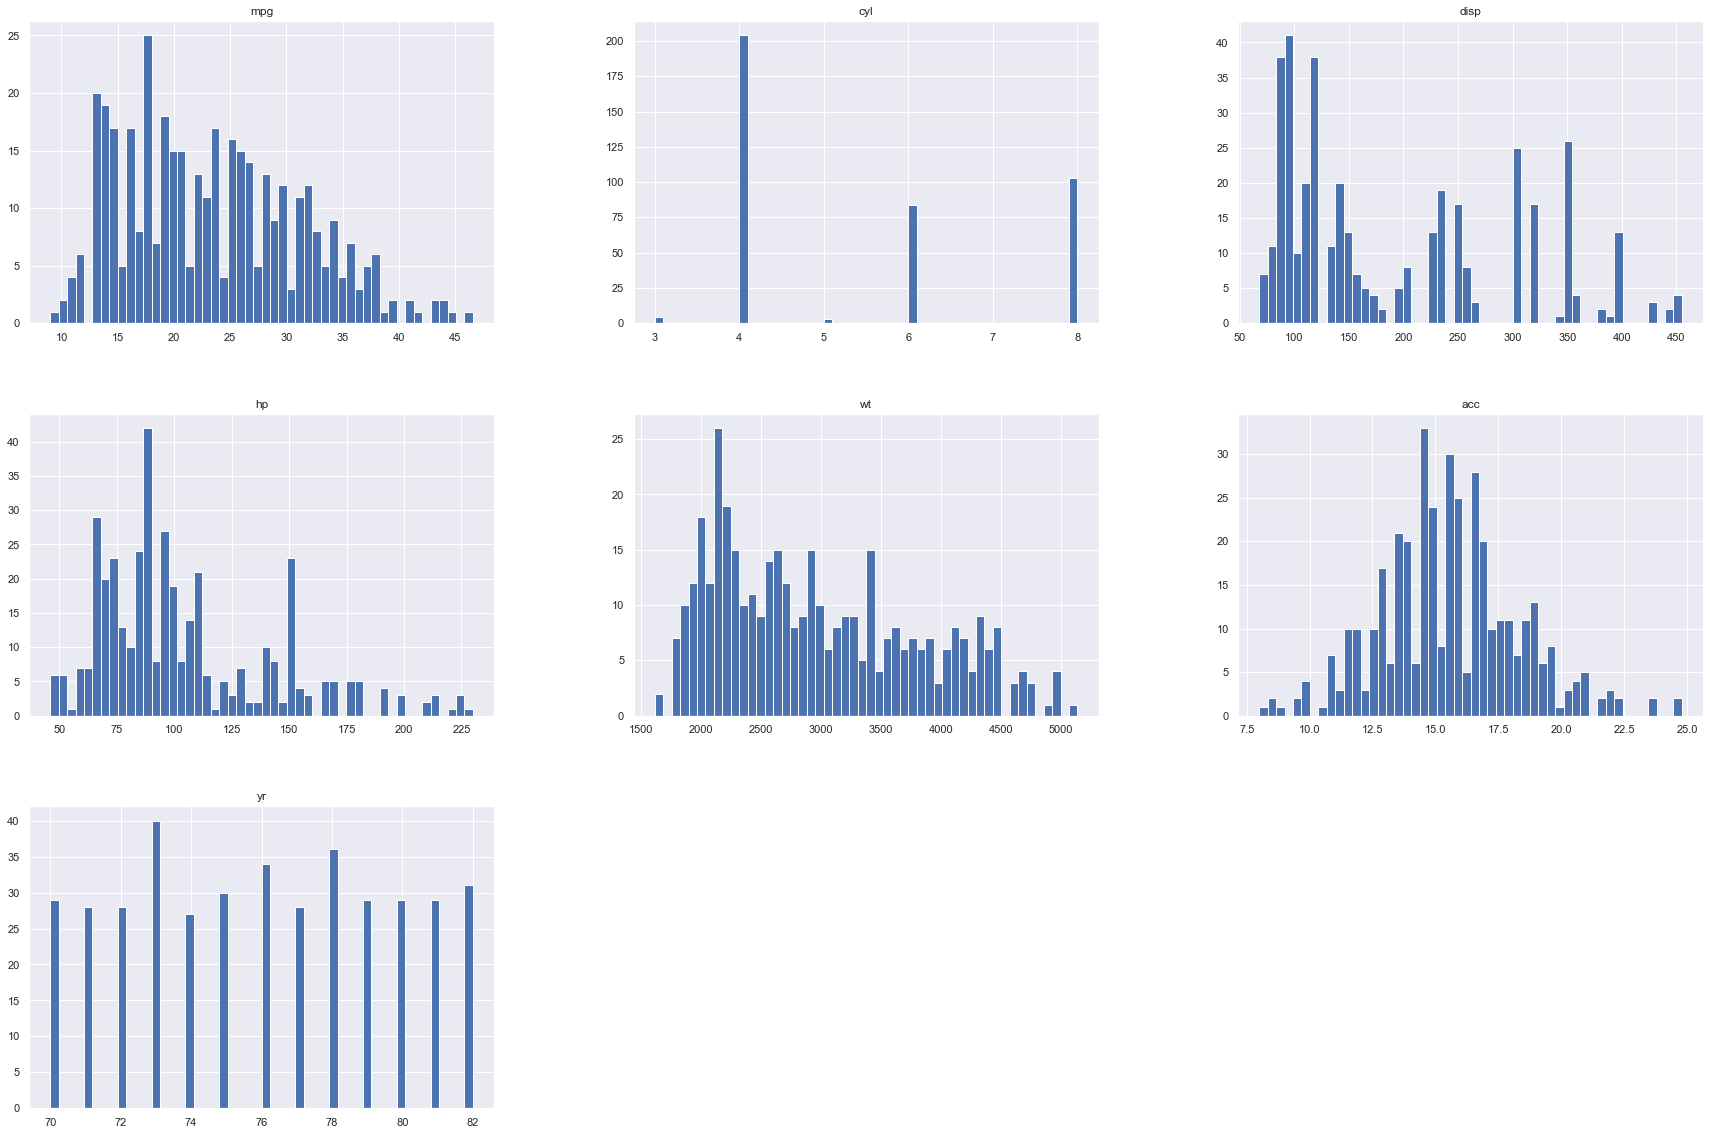

In [40]:
cardfAttr.hist(bins=50, figsize=(30,20))
plt.show()

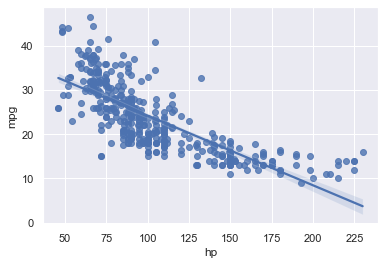

In [41]:
sns.regplot(x='hp',y='mpg',data=cardfAttr)

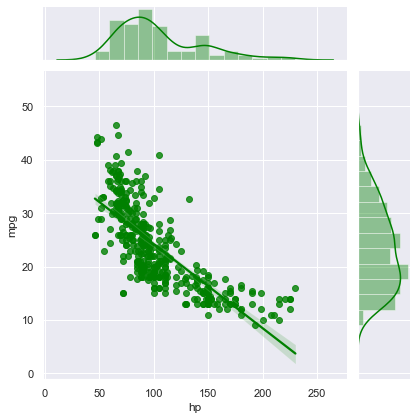

In [42]:
sns.jointplot(x='hp',y='mpg',data=cardfAttr,kind='reg',color='green')

In general, a higher horsepower indicates a lower mpg. There is lot of scattering of data between 50-100 hp

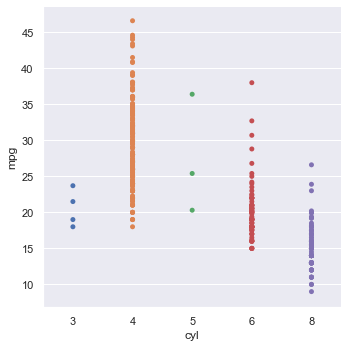

In [43]:
sns.catplot(x="cyl", y="mpg", jitter=False, data=cardfAttr)

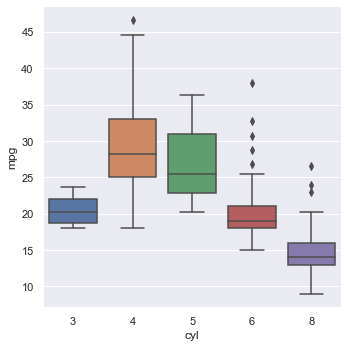

In [44]:
sns.catplot(x="cyl", y="mpg", kind="box", data=cardfAttr)

cars with 4 cylinder on an average gives higher miles per gallon. Cars with 6 and 8 cylinders have few outliers.

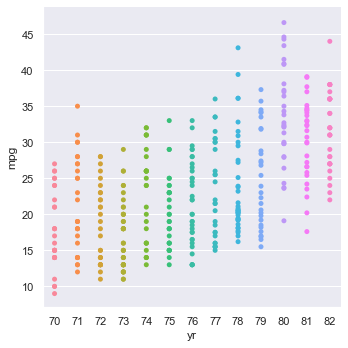

In [45]:
sns.catplot(x="yr", y="mpg", jitter=False, data=cardfAttr)

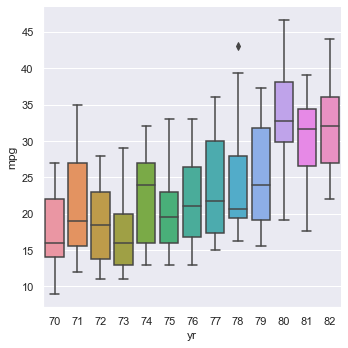

In [46]:
sns.catplot(x="yr", y="mpg", kind="box", data=cardfAttr)

cars with model year 78 and later gives on an average higher mpg

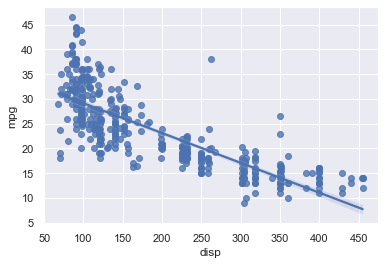

In [47]:
sns.regplot(x='disp',y='mpg',data=cardfAttr)

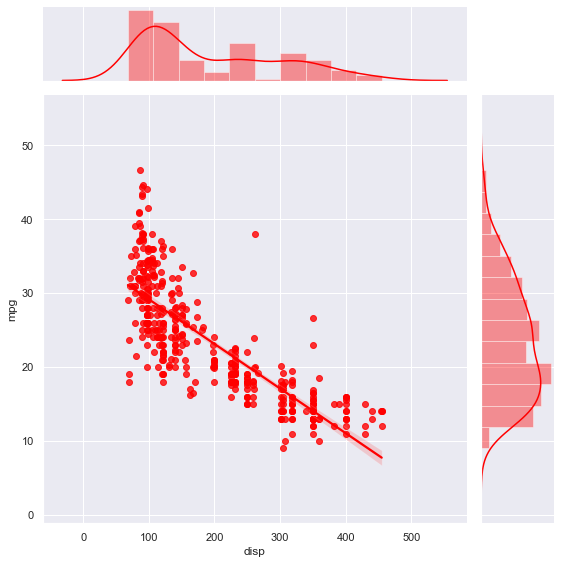

In [48]:
sns.jointplot(x='disp',y='mpg',data=cardfAttr,kind='reg',color='red',height=8)

On an average, cars with lower displacement gives higher mpg.

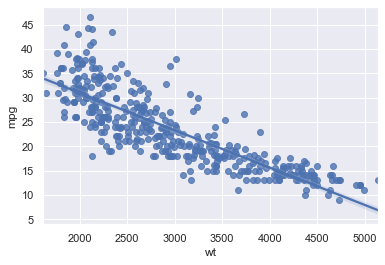

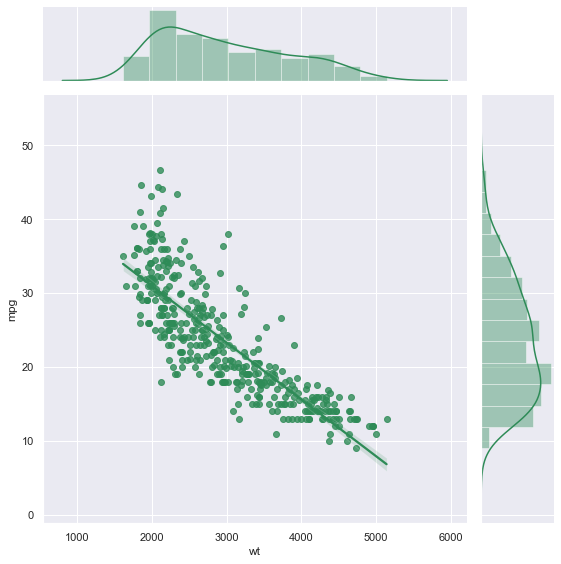

In [49]:
sns.regplot(x='wt',y='mpg',data=cardfAttr)
plt.show()
sns.jointplot(x='wt',y='mpg',data=cardfAttr,kind='reg',color='seagreen',height=8)
plt.show()

As the weight of car increses, mpg output of car descreases 

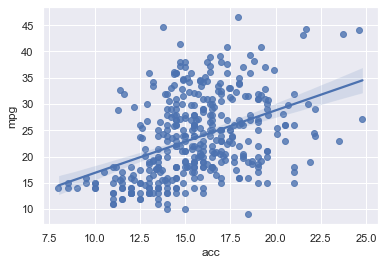

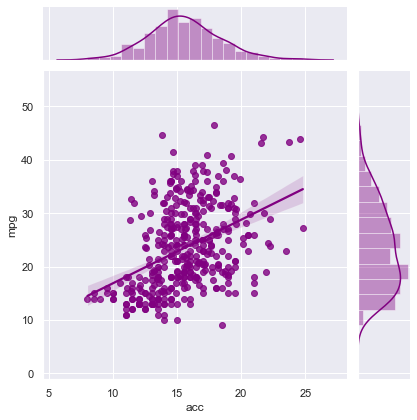

In [50]:
sns.regplot(x='acc',y='mpg',data=cardfAttr)
plt.show()
sns.jointplot(x='acc',y='mpg',data=cardfAttr,kind='reg',color='purple')
plt.show()

As seen from the graph, there is no uniform correlation between acceleration and mpg

<b> Multivariate analysis

In [51]:
#Separating independent variables and target variable
X = cardfAttr.drop(['mpg'],axis=1)
y = cardfAttr['mpg']

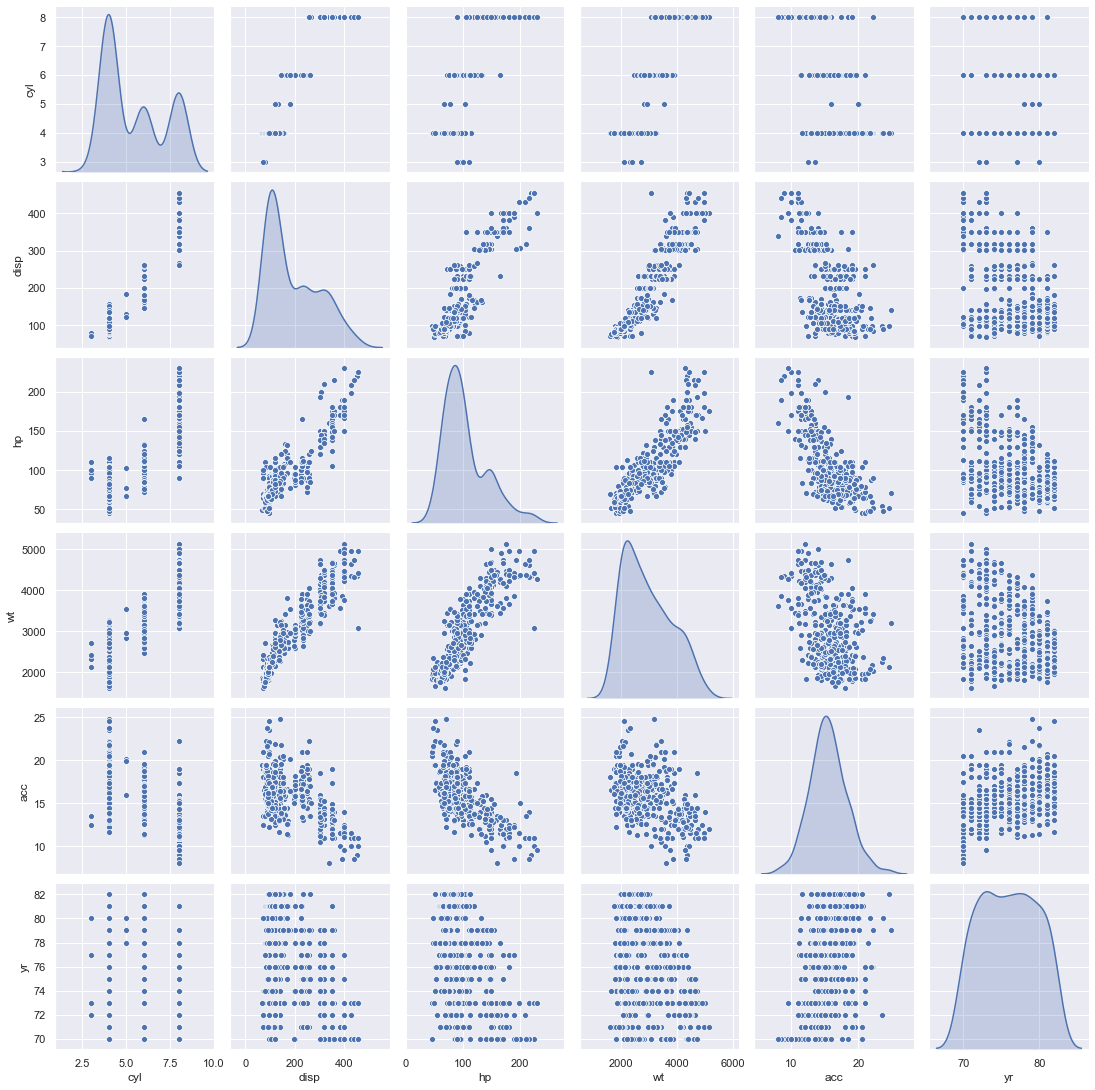

In [52]:
sns.pairplot(X, diag_kind='kde') 
plt.show()

As the graph shows above, many variables are dependent and correlated. Also, KDE curve shows that we can probably have 3 clusters.

We can also see correlation using heatmap. It again shows a strong correlation and dependency between variables.

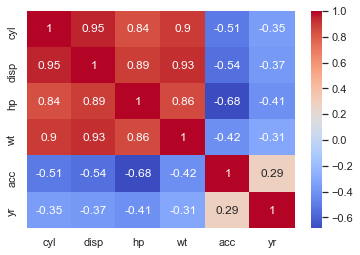

In [53]:
#Plotting heatmap for correlation
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)
plt.show()

<b> We will use PCA technique to combine features, and create independence

In [54]:
#Scaling the data
XScaled=X.apply(zscore)
XScaled.head()

cyl      disp        hp        wt       acc        yr
0  1.498191  1.090604  0.669196  0.630870 -1.295498 -1.627426
1  1.498191  1.503514  1.586599  0.854333 -1.477038 -1.627426
2  1.498191  1.196232  1.193426  0.550470 -1.658577 -1.627426
3  1.498191  1.061796  1.193426  0.546923 -1.295498 -1.627426
4  1.498191  1.042591  0.931311  0.565841 -1.840117 -1.627426

In [55]:
#Creating Covariance matrix
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00251889  0.95311615  0.84105256  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89589723  0.93517383 -0.54505356 -0.37109656]
 [ 0.84105256  0.89589723  1.00251889  0.86274199 -0.6859827  -0.4126879 ]
 [ 0.89827376  0.93517383  0.86274199  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.6859827  -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.4126879  -0.30733654  0.28886274  1.00251889]]


In [56]:
#Applying PCA
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [57]:
#Printing Eigen values
print(pca.explained_variance_)

[4.25994348 0.84071546 0.67496226 0.1377338  0.06548657 0.03627179]


In [58]:
#Printing the Eigen vectors
print(pca.components_)

[[ 0.45526182  0.46934018  0.46261026  0.44640084 -0.32468348 -0.23185157]
 [ 0.18219422  0.16027323  0.0151916   0.25624036  0.21010549  0.91163783]
 [ 0.17124425  0.13453195 -0.1247117   0.27173253  0.8676763  -0.3321488 ]
 [-0.64816936 -0.18920163  0.64431141  0.3209813   0.15899017  0.02520241]
 [ 0.30823437 -0.00158535  0.58816921 -0.69589394  0.26606201  0.06315596]
 [-0.46377301  0.83673991 -0.0955392  -0.27190298  0.03882393  0.01465116]]


In [59]:
#Analyzing percentage of variation explained by each eigen vector
print(pca.explained_variance_ratio_)

[0.70820668 0.13976718 0.11221106 0.02289796 0.01088701 0.00603011]


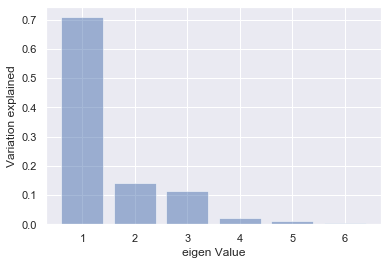

In [60]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

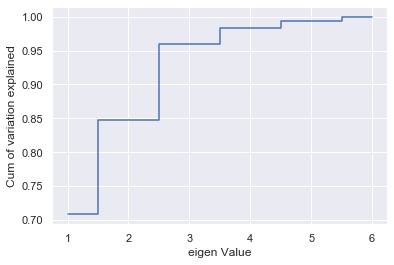

In [61]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

<b>As we can see that 3 eigen vectors collectively can show around 95% of variation in original data. Therefore we can apply dimensionality reduction with 3 variables.

In [62]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.45526182  0.46934018  0.46261026  0.44640084 -0.32468348 -0.23185157]
 [ 0.18219422  0.16027323  0.0151916   0.25624036  0.21010549  0.91163783]
 [ 0.17124425  0.13453195 -0.1247117   0.27173253  0.8676763  -0.3321488 ]]
[0.70820668 0.13976718 0.11221106]


Therefore, we reduced 6 features to 3 Principal components.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4. Machine Learning

#### Using K-means method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

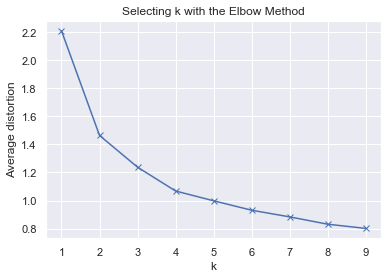

In [63]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
cluster=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Xpca3)
    prediction=model.predict(Xpca3)
    meanDistortions.append(sum(np.min(cdist(Xpca3, model.cluster_centers_, 'euclidean'), axis=1)) / Xpca3.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

As seen, there is a sharp elbow at K=2 and K=4. Therefore, we will try 2 and 4 clusters

<b> For K=2

In [64]:
final_model=KMeans(2)
final_model.fit(Xpca3)
prediction=final_model.predict(Xpca3)

#Append the prediction 
XScaled["GROUP"] = prediction
cardf["GROUP"] = prediction
print("Groups Assigned : \n")
cardf.head()

Groups Assigned : 



car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   GROUP  
0      1  
1      1  
2      1  
3      1  
4      1

<b> Analyzing the data among different groups

In [65]:
carClust = cardf.groupby(['GROUP'])
carClust.mean()

mpg       cyl        disp          hp          wt        acc  \
GROUP                                                                       
0      26.550340  4.568027  140.198980   85.336110  2569.47619  16.520408   
1      14.932692  7.961538  343.894231  158.557692  4103.87500  12.875962   

              yr   origin  
GROUP                      
0      76.768707  1.77551  
1      73.865385  1.00000

C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197D1944548>,
      dtype=object)

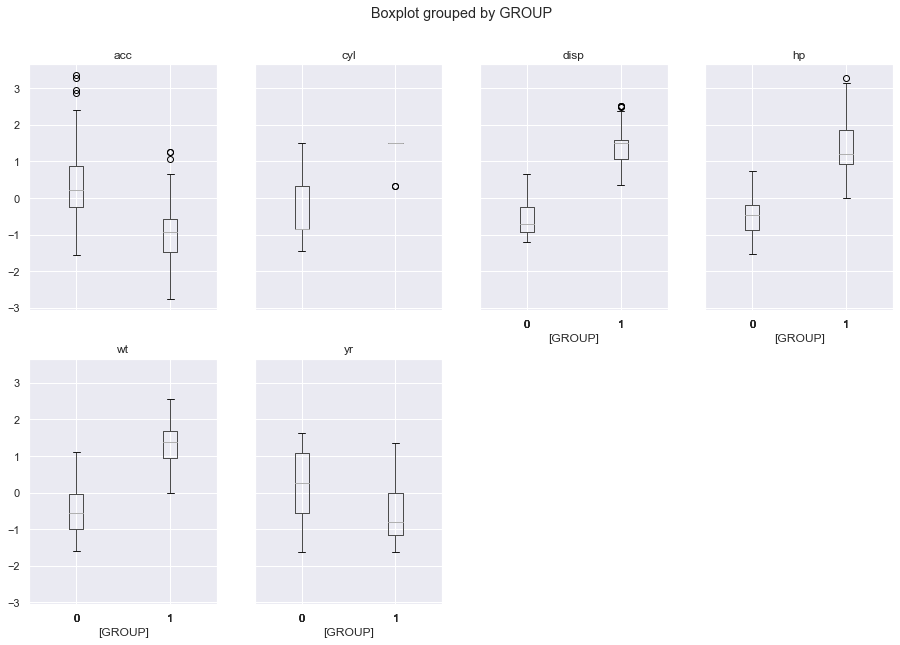

In [66]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<b> As we can see from above graph, each of the two groups is quite different. Therefore, data is appropriately clustered. Group 2 contains cars with higher weight which explains higher horsepower and higher displacement requirement and lower acceleration.

<b> Now, let us try clustering with K=4, as indicated by next elbow point

In [67]:
final_model=KMeans(4)
final_model.fit(Xpca3)
prediction=final_model.predict(Xpca3)

#Append the prediction 
XScaled["GROUP"] = prediction
cardf["GROUP"] = prediction
print("Groups Assigned : \n")
cardf.head()

Groups Assigned : 



car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   GROUP  
0      2  
1      2  
2      2  
3      2  
4      2

<b> Analyzing data among different groups

In [68]:
carClust = cardf.groupby(['GROUP'])
carClust.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      19.946591  6.193182  227.761364  103.368970  3280.375000  16.395455   
1      31.750820  4.016393  112.196721   78.195718  2347.040984  16.533607   
2      14.429787  8.000000  350.042553  162.393617  4157.978723  12.576596   
3      25.250000  4.085106  110.090426   81.675206  2301.776596  16.531915   

              yr    origin  
GROUP                       
0      76.465909  1.181818  
1      79.877049  1.967213  
2      73.468085  1.000000  
3      73.106383  2.000000

C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197CA187C08>,
      dtype=object)

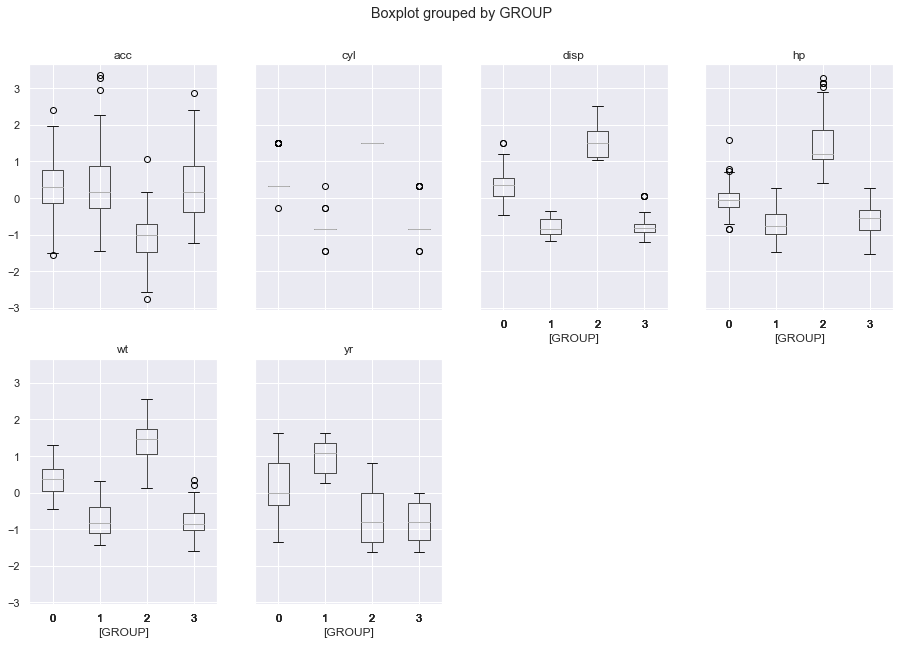

In [69]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<b> Again, as seen from the graph above, each of the 4 clusters are distinct. However, distinction is not very specific. Though, Cluster 1 contains high horsepower, high weight and high displacement.But other 3 clusters are quite close in terms of different attributes, and therefore don't represent necessarily different groups.
    
Therefore, K=2 seems to be more appropriate clustering

We can validate the same using <b> Silhouette Coefficient

In [70]:
#Let us find Silhouette score for K=2 and K=4

In [71]:
#K=2
model = KMeans(2)
model.fit(Xpca3)
prediction=model.predict(Xpca3)
centers = model.cluster_centers_

score = silhouette_score(Xpca3, prediction)
print("For n_clusters = {}, silhouette score is {})".format(2, score))

#K=4
model = KMeans(4)
model.fit(Xpca3)
prediction=model.predict(Xpca3)
centers = model.cluster_centers_

score = silhouette_score(Xpca3, prediction)
print("For n_clusters = {}, silhouette score is {})".format(4, score))

For n_clusters = 2, silhouette score is 0.5227563861280159)
For n_clusters = 4, silhouette score is 0.37787837484513764)


<b> As further confirmed by silhouette scoring, K=2 clusters have a higher silhouette score than K=4. Therefore, ideal number of clusters are 2.

#### Hierarchical Clustering

Let us now use hierarchical clustering to identify number of clusters

In [72]:
#We will first use silhouette score to find optimal number of clusters
silhouette_scores = {}
for k in range(2,10):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(Xpca3)
    prediction=model.fit_predict(Xpca3)
    score=silhouette_score(Xpca3, prediction)
    silhouette_scores[k]=score

In [73]:
silhouette_scores

{2: 0.5234653101001637,
 3: 0.3487066926869827,
 4: 0.3423503845539164,
 5: 0.296691070670776,
 6: 0.260811415255337,
 7: 0.25369173217098595,
 8: 0.2140967845213008,
 9: 0.26341486979627143}

<b> Thus we get highest silhouette score for K=2. This indicates that optimal number of clusters are 2

In [74]:
#Defining and fitting the model
hmodel=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
hmodel.fit(Xpca3)
prediction=hmodel.fit_predict(Xpca3)

In [75]:
#Append the prediction 
XScaled["GROUP"] = prediction
cardf["GROUP"] = prediction
print("Groups Assigned : \n")
cardf.head(10)

Groups Assigned : 



car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   
5           ford galaxie 500  15.0    8  429.0  198.0  4341  10.0  70       1   
6           chevrolet impala  14.0    8  454.0  220.0  4354   9.0  70       1   
7          plymouth fury iii  14.0    8  440.0  215.0  4312   8.5  70       1   
8           pontiac catalina  14.0    8  455.0  225.0  4425  10.0  70       1   
9         amc ambassador dpl  15.0    8  390.0  190.0  3850   8.5  70       1   

   GROUP  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1

In [76]:
carClust = cardf.groupby(['GROUP'])
carClust.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      26.477852  4.607383  142.404362   85.700726  2584.137584  16.529866   
1      14.684000  7.980000  345.470000  160.400000  4121.560000  12.702000   

              yr    origin  
GROUP                       
0      76.771812  1.765101  
1      73.740000  1.000000

In [77]:
# Calculating cophenet index to further confirm the clustering

Z = linkage(XScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Xpca3))
print(c)

0.8049550195095541


As it is closer to 1, it shows that data points are accurately assigned to respective clusters.

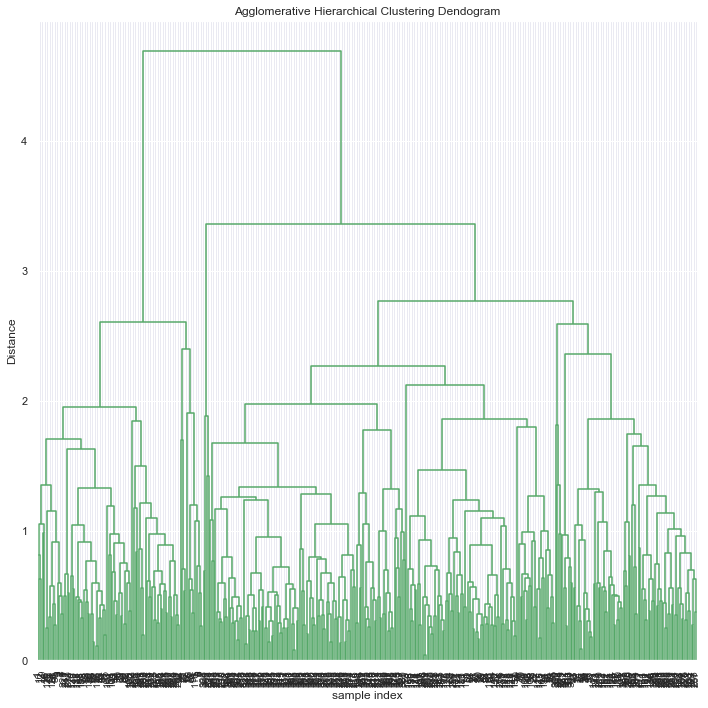

In [78]:
#Plotting Dendogram
plt.figure(figsize=(10,10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

<b> Insights
 
<b> As we have seen above, using both K means and Hierarchical Agglomerative technique suggested use of two Clusters. Same was verified using elbow method and Silhouette score in K means clustering, and by using Silhouette score and copenhet score in Hierarchical clustering. However, on the underlying basis both these techniques work differently. While Hierarchical clustering used a bottom up approach (as can be seen from Dendogram), K mean used centroids to form clusters. On computation side also, as this was a small dataset, we could apply both K means and Hierarchical clustering. However, had it been a large data set, Hierarchical clustering would not have been suitable as it would have required lot of storage for computing and storing distane matrix which would have made is computationally expensive.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5. Answering questions based on outcomes of using ML based methods.

<b><I> Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

<b> As concluded from both K means and Hierarchical clustering, optimal number of clusters for the given dataset are 2. Let us again take a look at the two groups to better understand this.

In [79]:
carClust.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      26.477852  4.607383  142.404362   85.700726  2584.137584  16.529866   
1      14.684000  7.980000  345.470000  160.400000  4121.560000  12.702000   

              yr    origin  
GROUP                       
0      76.771812  1.765101  
1      73.740000  1.000000

<b> As can be inferred above, Group 1 contains cars having high mpg on an average. These are the cars with lower horsepower, lower weight and lower displacement on an average.On the other hand, Group 2 contains cars with lower mpg on an average which can be explained by higher weight, hier horsepower and higher displacement on an average.

This can also be inferred from the box plot

C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197CE4B57C8>,
      dtype=object)

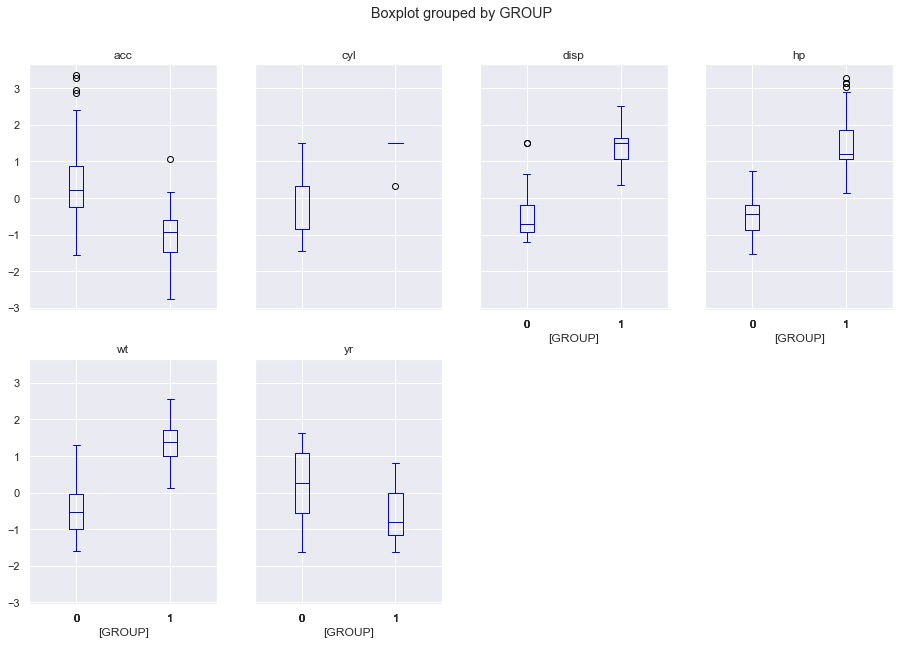

In [80]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10),color='blue')

<b>Use linear regression model on different clusters separately and print the coefficients of the models individually

In [81]:
cardf.head(10)

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   
5           ford galaxie 500  15.0    8  429.0  198.0  4341  10.0  70       1   
6           chevrolet impala  14.0    8  454.0  220.0  4354   9.0  70       1   
7          plymouth fury iii  14.0    8  440.0  215.0  4312   8.5  70       1   
8           pontiac catalina  14.0    8  455.0  225.0  4425  10.0  70       1   
9         amc ambassador dpl  15.0    8  390.0  190.0  3850   8.5  70       1   

   GROUP  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1

In [82]:
#Checking for null values
cardf.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
GROUP       0
dtype: int64

In [83]:
#Separating original ddataset in two clusters
cluster1df=cardf[cardf['GROUP']==0]
cluster2df=cardf[cardf['GROUP']==1]

In [84]:
cluster1df.head(10)

car_name   mpg  cyl   disp     hp    wt   acc  yr  \
14         toyota corona mark ii  24.0    4  113.0   95.0  2372  15.0  70   
15               plymouth duster  22.0    6  198.0   95.0  2833  15.5  70   
16                    amc hornet  18.0    6  199.0   97.0  2774  15.5  70   
17                 ford maverick  21.0    6  200.0   85.0  2587  16.0  70   
18                  datsun pl510  27.0    4   97.0   88.0  2130  14.5  70   
19  volkswagen 1131 deluxe sedan  26.0    4   97.0   46.0  1835  20.5  70   
20                   peugeot 504  25.0    4  110.0   87.0  2672  17.5  70   
21                   audi 100 ls  24.0    4  107.0   90.0  2430  14.5  70   
22                      saab 99e  25.0    4  104.0   95.0  2375  17.5  70   
23                      bmw 2002  26.0    4  121.0  113.0  2234  12.5  70   

    origin  GROUP  
14       3      0  
15       1      0  
16       1      0  
17       1      0  
18       3      0  
19       2      0  
20       2      0  
21       2      0  
22       2      0  
23       2      0

In [85]:
cluster1df.shape

(298, 10)

In [86]:
cluster1df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 14 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  298 non-null    object 
 1   mpg       298 non-null    float64
 2   cyl       298 non-null    int64  
 3   disp      298 non-null    float64
 4   hp        298 non-null    float64
 5   wt        298 non-null    int64  
 6   acc       298 non-null    float64
 7   yr        298 non-null    int64  
 8   origin    298 non-null    int64  
 9   GROUP     298 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 25.6+ KB


In [87]:
cluster2df.head(10)

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   
5           ford galaxie 500  15.0    8  429.0  198.0  4341  10.0  70       1   
6           chevrolet impala  14.0    8  454.0  220.0  4354   9.0  70       1   
7          plymouth fury iii  14.0    8  440.0  215.0  4312   8.5  70       1   
8           pontiac catalina  14.0    8  455.0  225.0  4425  10.0  70       1   
9         amc ambassador dpl  15.0    8  390.0  190.0  3850   8.5  70       1   

   GROUP  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1

In [88]:
cluster2df.shape

(100, 10)

<b> Using Linear Regression model on Cluster 1

In [89]:
#Getting X and y for first cluster
X_cl1 = cluster1df.drop(['mpg','car_name','GROUP'],axis=1)
y_cl1 = cluster1df['mpg']

In [90]:
# Split X and y into training and test set in 70:30 ratio

X_train_cl1, X_test_cl1, y_train_cl1, y_test_cl1 = train_test_split(X_cl1, y_cl1, test_size=0.30, random_state=1)

In [91]:
#Fit Linear regression model on first cluster
regression_model1 = LinearRegression()
regression_model1.fit(X_train_cl1, y_train_cl1)

LinearRegression()

Printing coefficient of model for each variable and intercept for <b> Cluster 1

In [94]:
for idx, col_name in enumerate(X_train_cl1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[idx]))

The coefficient for cyl is 0.5772776542456043
The coefficient for disp is -0.002036145444188682
The coefficient for hp is -0.05578198765662192
The coefficient for wt is -0.007613756532355885
The coefficient for acc is 0.2237846108551788
The coefficient for yr is 0.8981002468284756
The coefficient for origin is 0.9416713486466458


In [95]:
intercept = regression_model1.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -25.586222579892702


In [96]:
#Model score for train and test
train_score=regression_model1.score(X_train_cl1, y_train_cl1)
test_score=regression_model1.score(X_test_cl1, y_test_cl1)
y_pred=regression_model1.predict(X_test_cl1)
mse=mean_squared_error(y_test_cl1,y_pred)
print(train_score)
print(test_score)
print(mse)

0.7582830128983192
0.805022608186189
7.790205907049878


In [100]:
#Adding performance metrics to a dataframe
resultsDf = pd.DataFrame({'Data':['Cluster1'],  'Train data score': train_score,
                          'Test data score': test_score, 'MSE':mse})
resultsDf = resultsDf[['Data', 'Train data score','Test data score','MSE']]

<b> Using Linear Regression model on Cluster 2

In [101]:
#Getting X and y for second cluster
X_cl2 = cluster2df.drop(['mpg','car_name','GROUP'],axis=1)
y_cl2 = cluster2df[['mpg']]

In [102]:
# Split X and y into training and test set in 70:30 ratio

X_train_cl2, X_test_cl2, y_train_cl2, y_test_cl2 = train_test_split(X_cl2, y_cl2, test_size=0.30, random_state=1)

In [103]:
#Fit Linear regression model on second cluster
regression_model2 = LinearRegression()
regression_model2.fit(X_train_cl2, y_train_cl2)

LinearRegression()

Printing coefficient of model for each variable and intercept for <b> Cluster 2

In [104]:
for idx, col_name in enumerate(X_train_cl2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

The coefficient for cyl is -0.043306503532277246
The coefficient for disp is -0.0029885506255018595
The coefficient for hp is -0.021000267245218553
The coefficient for wt is -0.0015318393854526458
The coefficient for acc is -0.4443184451861251
The coefficient for yr is 0.4417429819560383
The coefficient for origin is 0.0


In [105]:
intercept = regression_model2.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.1096604330468551


In [106]:
#Model score for train and test
train_score=regression_model2.score(X_train_cl2, y_train_cl2)
test_score=regression_model2.score(X_test_cl2, y_test_cl2)
print(train_score)
print(test_score)
y_pred=regression_model2.predict(X_test_cl2)
mse=mean_squared_error(y_test_cl2,y_pred)
print(mse)

0.601512483595422
0.6427750541550598
1.4475905863795817


In [158]:
#Adding Performance metrics to the list
tempResultsDf = pd.DataFrame({'Data':['Cluster 2'],  'Train data score': train_score,
                          'Test data score': test_score,'MSE':mse})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Data', 'Train data score','Test data score','MSE']]

<b> Applying model on entire dataset without clustering

In [159]:
#Getting X and y
X = cardf.drop(['mpg','car_name','GROUP'],axis=1)
y = cardf['mpg']

In [160]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [161]:
#Fit Linear regression model on enstire dataset
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [162]:
#Model score for train and test
train_score=regression_model.score(X_train, y_train)
test_score=regression_model.score(X_test, y_test)
print(train_score)
print(test_score)
y_pred=regression_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)


0.8081709162466811
0.8469962763062654
8.945659787984367


In [163]:
#Adding Performance metrics to the list
tempResultsDf = pd.DataFrame({'Data':['Entire Dataset'],  'Train data score': train_score,
                          'Test data score': test_score,'MSE':mse})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Data', 'Train data score','Test data score','MSE']]
resultsDf

Data  Train data score  Test data score       MSE
0        Cluster1          0.758283         0.805023  7.790206
0       Cluster 2          0.601512         0.642775  1.447591
0  Entire Dataset          0.808171         0.846996  8.945660

<b> As seen from summary of results above, when we apply model individually to Cluster 1 and Cluster 2, we get high train and test R2 score for Cluster 1 as compared to Cluster2. However, Cluster 2 gives a low Mean Squared Error of 1.44.
    
<b> When model is applied on entire dataset, although score increases for both train and test data;Mean Squared Error also increases. This indicates that when model will be used on actual data, it will likely shows a high variance between actual data and predicted values. Therefore, model will not make accurate predictions. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5. Insights

<b> We were able to determine optimal number of clusters (2) using both K-means and Hierarchical Clustering techniques. Prior to that we were able achieve dimensionality reduction of dataset through PCA.
    
Later we applied Linear Regression models on different clusters separately and also on entire dataset.

1) First and foremost, quantity of data is too low. There were only 398 records in original dataset. While this may be fine from clustering perspective, but not sufficient for predictions. If we can get good volume of data, predictive model will be better in terms of accuracy and performance. Low volume of data resulted in underfitting of model.
    
2) Data is limited to car model from years 70-80. Therefore, from a clustering point of view it might be ok, but when it comes to prediction, we must have variety of data for car model through recent years.
    
3) Additional attributes like weather conditions, road condition, speed limit might provide a better insight for mpg consumption.

### Part 2 - Manufacturing (Synthetic data generator)

In [167]:
#Importing data
winedf = pd.read_excel('Part2 - Company.xlsx')

In [168]:
winedf.head(10)

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A
5  153  140  154  199        NaN
6   34   28   78   22  Quality A
7  191  144  143  154        NaN
8  160  181  194  178  Quality B
9  145  178  158  141        NaN

In [169]:
winedf.shape

(61, 5)

In [170]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [171]:
winedf['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [172]:
#Converting Quality attribute to categorical
winedf['Quality'] = pd.Categorical(winedf['Quality'])

In [173]:
#Verifying datatype
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   A        61 non-null     int64   
 1   B        61 non-null     int64   
 2   C        61 non-null     int64   
 3   D        61 non-null     int64   
 4   Quality  43 non-null     category
dtypes: category(1), int64(4)
memory usage: 2.2 KB


In [174]:
#Checking for null values
winedf.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [175]:
#For the purpose of building a ML model, taking data with non null values for Quality
tempdf=winedf[winedf['Quality'].isnull()==False]

In [176]:
replaceStruct = {"Quality": {"Quality A": 1, "Quality B": 2}}

In [177]:
#Converting Quality attribute to continous
tempdf=tempdf.replace(replaceStruct)
tempdf.head(10)

A    B    C    D  Quality
0    47   27   45  108        1
1   174  133  134  166        2
3    61   23    3   44        1
4    59   60    9   68        1
6    34   28   78   22        1
8   160  181  194  178        2
10   76   94  107   37        1
11  138  200  153  192        2
12   27  106   57   37        1
13   45   76   56   57        1

In [178]:
#Separating data into features and target variable
X = tempdf.drop('Quality',axis=1)
y = tempdf['Quality']

In [179]:
y.value_counts()

1    26
2    17
Name: Quality, dtype: int64

In [180]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [183]:
# Fit the model on train data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#predict on test
y_predict = knn.predict(X_test)

In [186]:
#Accuracy score
accuracy_score(y_test,y_predict)

1.0

In [187]:
#Model score on train and test data
train_score=knn.score(X_train, y_train)
test_score=knn.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
1.0


In [190]:
#Defining a function to impute missing Quality values
def synthetic_data_genr(dataframe):
    for ind in range(len(dataframe)):
        if pd.isna(dataframe.loc[ind, "Quality"]):
            #Prediting Quality
            quality=knn.predict(dataframe.loc[[ind], ['A','B','C','D']])
            if(quality == 1):
                dataframe.iloc[ind,4]='Quality A'
            else:
                dataframe.iloc[ind,4]='Quality B'  
    return dataframe

In [191]:
#Applying function on dataframe to impute missing Quality values
winedf=synthetic_data_genr(winedf)

In [192]:
#Confirming that there are no null values after applying function
winedf.isnull().sum()

A          0
B          0
C          0
D          0
Quality    0
dtype: int64

### Part 3 - Automobile (Silhouette)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Data Import, cleaning and pre-processing

In [237]:
vehicledf=pd.read_csv('Part3 - vehicle.csv')

In [238]:
vehicledf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [239]:
vehicledf.shape

(846, 19)

In [240]:
vehicledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [241]:
vehicledf.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [242]:
#Imputing all missing values for columns with avarage. We have confirmed that all columns with missing values are continous
vehicledf=vehicledf.fillna(vehicledf.mean())

In [243]:
#Confirming that there are no missing values
vehicledf.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [244]:
vehicledf['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [245]:
#Converting class attribute to categorical
vehicledf['class'] = pd.Categorical(vehicledf['class'])

In [246]:
#Converting to continuous
vehicledf=vehicledf.replace({"class": {"car": 1, "bus": 2, "van":3}})

In [247]:
vehicledf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95    48.000000                  83.0    178.000000   
1           91    41.000000                  84.0    141.000000   
2          104    50.000000                 106.0    209.000000   
3           93    41.000000                  82.0    159.000000   
4           85    44.000000                  70.0    205.000000   
5          107    44.828775                 106.0    172.000000   
6           97    43.000000                  73.0    173.000000   
7           90    43.000000                  66.0    157.000000   
8           86    34.000000                  62.0    140.000000   
9           93    44.000000                  98.0    168.888095   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      3  
1             189.0            199      3  
2             188.0            196      1  
3             199.0            207      3  
4             180.0        

In [248]:
vehicledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. EDA and Visualization

In [249]:
#Describing the data
vehicledf.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.728132    0.818044    1.0    1.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    2.00     3.0

In [250]:
#Finding correlation
vehicledf.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about.1                0.157387    -0.011851              0.265553   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
class                          -0.297774    -0.251225             -0.428136   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr.axis_aspect_ratio             0.663559              1.000000   
max.length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr.axis_rectangularity           0.708285              0.079395   
max.length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance.1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration.1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about.1                 0.173832             -0.032134   
skewness_about.2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   
class                           -0.402130              0.038629   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr.axis_aspect_ratio                        0.648704       0.103715   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance.1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295574      -0.027985   
skewness_about                            

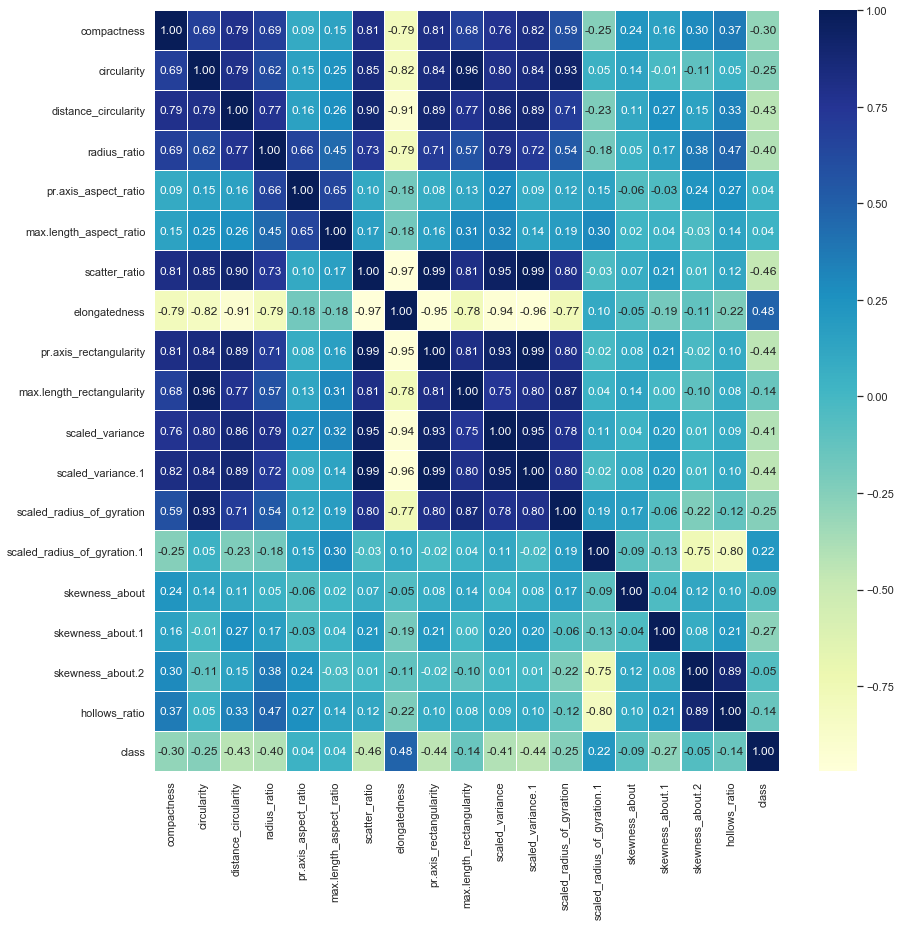

In [251]:
#Plotting heatmap for correlation
fig,ax = plt.subplots(figsize=(14, 14))   
sns.heatmap(vehicledf.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="YlGnBu")
plt.show()

<b> As seen above, following variables have strong correlation. This will cause multicollinearity issue.
    
1) circularity and max.length_rectangularity
    
2) Scatter_ratio and pr.axis_rectangularity
    
3) Scatter_ratio and scaled_variance
    
4) Scatter_ratio and scaled_variance.1
    
5) Scatter_ratio and elongatedness
    
6) elongatedness and pr.axis_rectangularity
    
7) elongatedness and scaled_variance
    
8) elongatedness and scaled_variance.1
    
9) pr.axis_rectangularity and scaled_variance
    
10) pr.axis_rectangularity and scaled_variance.1
    
11) scaled_variance and scaled_variance.1

<b> We will follow 2 approaches from here -

1) Create a new dataframe by dropping columns from highly correlated set. We will call it vehicledfOrig. Later we will train SVM classifier on this set.

2) Use original dataframe to identify X (independent variables) and y(target variable). Later use PCA technique on X to combine features. We will then train SVM classifier on this set.
    

Compare performance of #1 and #2

In [252]:
#So let us start with approach #1 by dropping the correlated columns
vehicledfOrig = vehicledf.drop(['circularity','pr.axis_rectangularity','scaled_variance','scaled_variance.1',
                                'elongatedness'],axis=1)

In [253]:
vehicledfOrig.shape

(846, 14)

In [254]:
vehicledfOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   distance_circularity         846 non-null    float64
 2   radius_ratio                 846 non-null    float64
 3   pr.axis_aspect_ratio         846 non-null    float64
 4   max.length_aspect_ratio      846 non-null    int64  
 5   scatter_ratio                846 non-null    float64
 6   max.length_rectangularity    846 non-null    int64  
 7   scaled_radius_of_gyration    846 non-null    float64
 8   scaled_radius_of_gyration.1  846 non-null    float64
 9   skewness_about               846 non-null    float64
 10  skewness_about.1             846 non-null    float64
 11  skewness_about.2             846 non-null    float64
 12  hollows_ratio                846 non-null    int64  
 13  class               

<b> Univariate Analysis

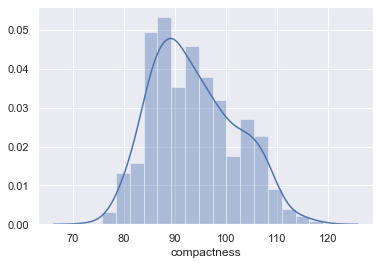

In [255]:
sns.distplot(vehicledfOrig['compactness'])
plt.show()

Compactness shows a unimodal distribution with no outliers

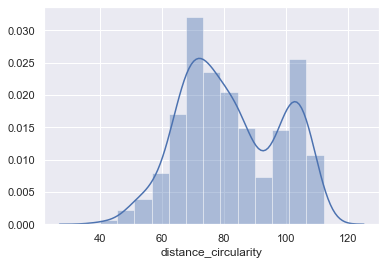

In [256]:
sns.distplot(vehicledfOrig['distance_circularity'])
plt.show()

Distance_circularity is bimodal with no outliers

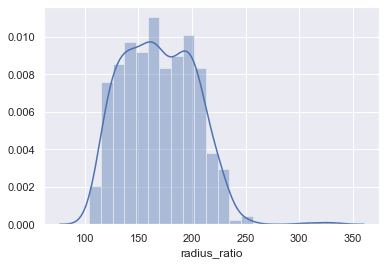

In [257]:
sns.distplot(vehicledfOrig['radius_ratio'])
plt.show()

radius_ratio has near uniform distribution with few outliers

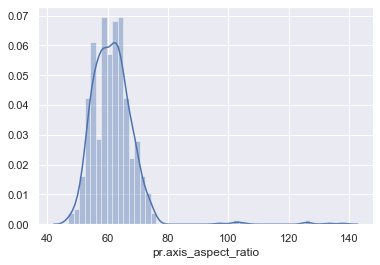

In [258]:
sns.distplot(vehicledfOrig['pr.axis_aspect_ratio'])
plt.show()

pr.axis_aspect_ratio is uniformly distributed with few outliers

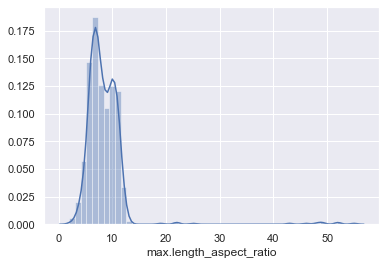

In [259]:
sns.distplot(vehicledfOrig['max.length_aspect_ratio'])
plt.show()

max.length_aspect_ratio is bimodal with few outliers

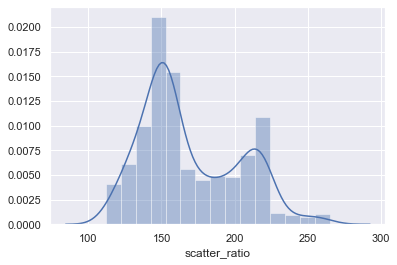

In [260]:
sns.distplot(vehicledfOrig['scatter_ratio'])
plt.show()

scatter_ratio has bimodal distribution

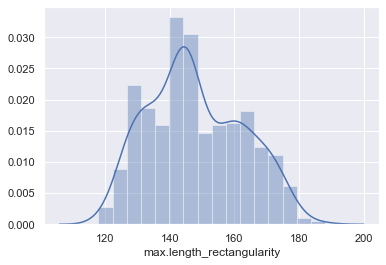

In [261]:
sns.distplot(vehicledfOrig['max.length_rectangularity'])
plt.show()

max.length_rectangularity is multimodal with no outliers

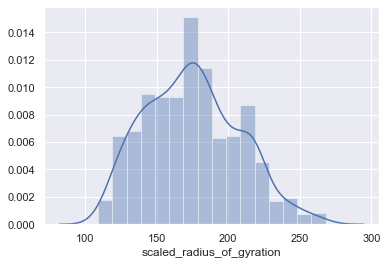

In [262]:
sns.distplot(vehicledfOrig['scaled_radius_of_gyration'])
plt.show()

scaled_radius_of_gyration is multimodal with no outliers

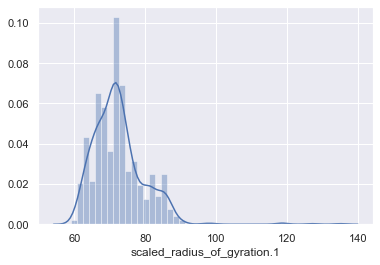

In [263]:
sns.distplot(vehicledfOrig['scaled_radius_of_gyration.1'])
plt.show()

scaled_radius_of_gyration.1 is multimodal with few outliers

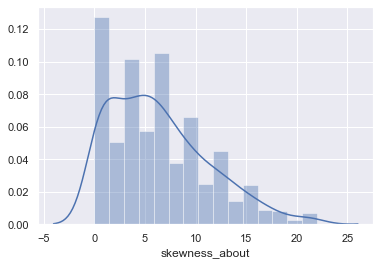

In [264]:
sns.distplot(vehicledfOrig['skewness_about'])
plt.show()

skewness_about is bimodal skewed towards the right

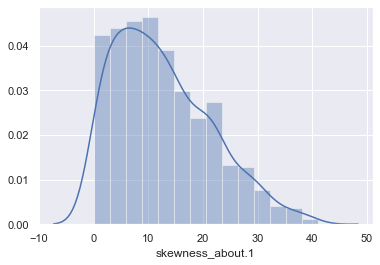

In [265]:
sns.distplot(vehicledfOrig['skewness_about.1'])
plt.show()

skweness_about.1 is unimodal and skewed towards the right

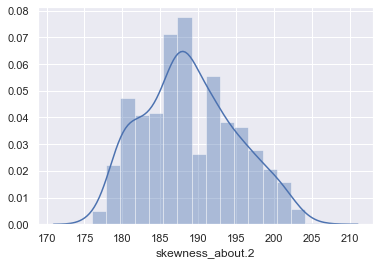

In [266]:
sns.distplot(vehicledfOrig['skewness_about.2'])
plt.show()

skewness_about.2 is near normally distributed with no outliers

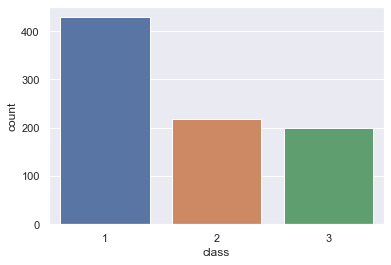

In [267]:
sns.countplot(x='class',data=vehicledfOrig)
plt.show()

As seen, most of the data in the dataset belongs to class 1 (Cars)

We can also check for outliers using boxplot

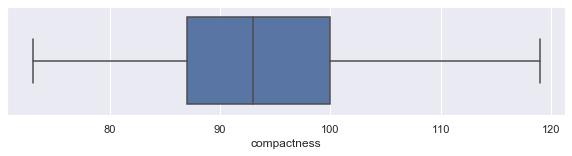

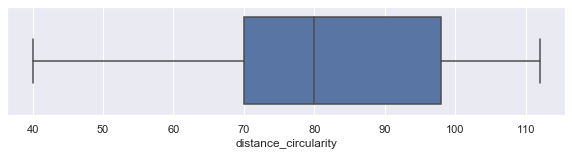

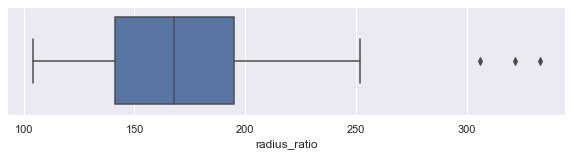

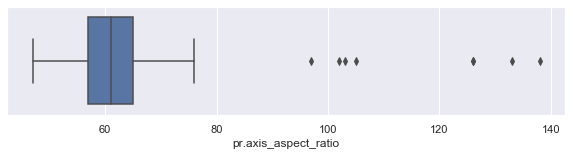

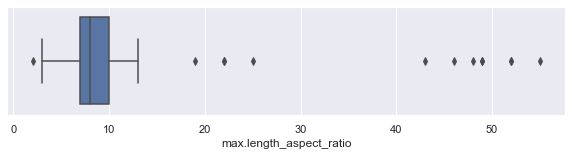

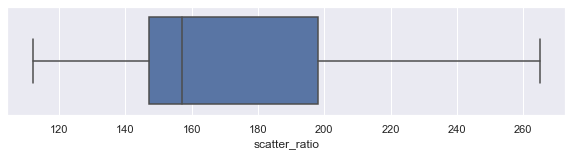

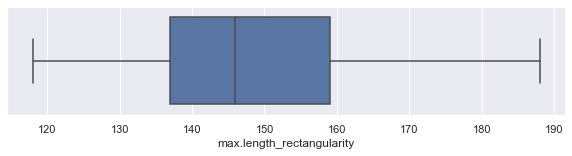

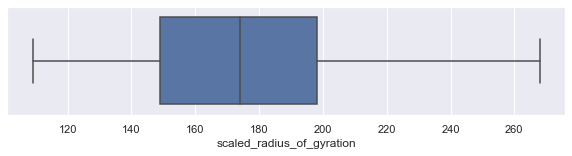

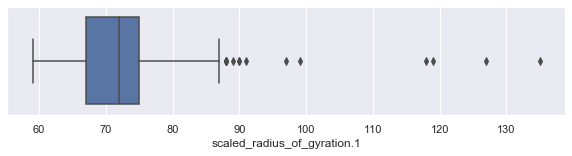

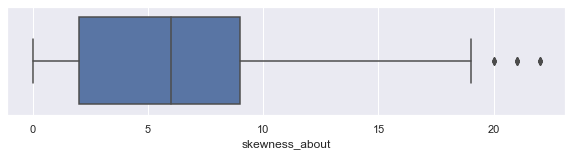

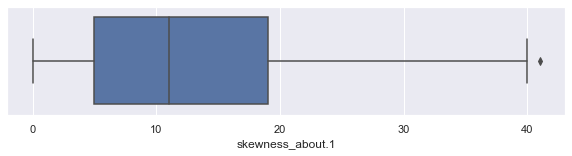

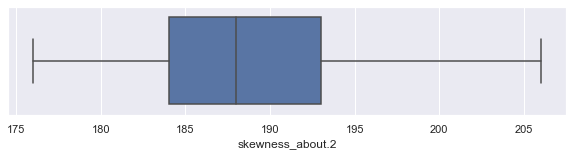

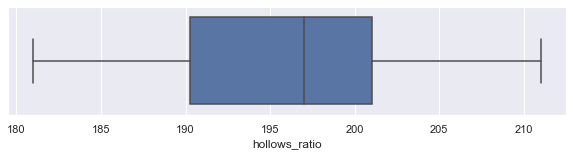

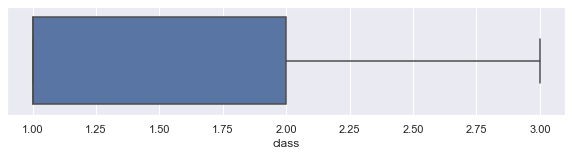

In [268]:
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['compactness'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['distance_circularity'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['radius_ratio'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['pr.axis_aspect_ratio'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['max.length_aspect_ratio'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['scatter_ratio'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['max.length_rectangularity'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['scaled_radius_of_gyration'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['scaled_radius_of_gyration.1'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['skewness_about'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['skewness_about.1'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['skewness_about.2'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['hollows_ratio'])
plt.show()
plt.figure(figsize=[10,2])
sns.boxplot(vehicledfOrig['class'])
plt.show()

As seen above, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio,scaled_radius_of_gyration.1, skewness_about have outliers

<b>Bivariate Analysis

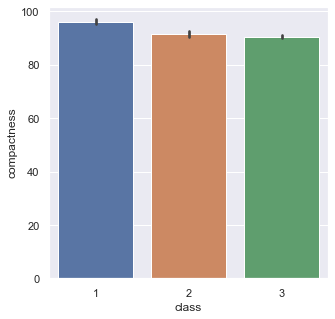

In [269]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='compactness',x='class',data=vehicledfOrig)
plt.show()

Vehicles with high compactness are likely to be Cars

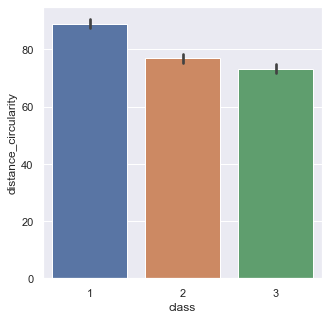

In [270]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='distance_circularity',x='class',data=vehicledfOrig)
plt.show()

Vehicles with high distance_circularity are likely to be cars

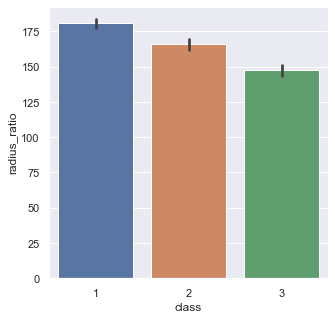

In [271]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='radius_ratio',x='class',data=vehicledfOrig)
plt.show()

Vehicles with high radius_ratio are likely to be cars

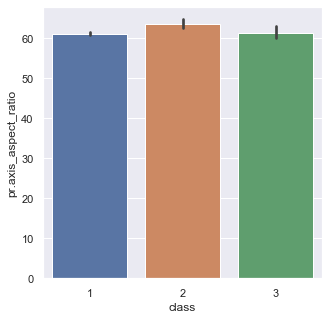

In [272]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='pr.axis_aspect_ratio',x='class',data=vehicledfOrig)
plt.show()

Vehicles with higher pr.axis_aspect_ratio are likely to be buses (class 2)

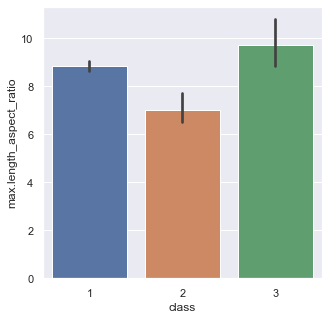

In [273]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='max.length_aspect_ratio',x='class',data=vehicledfOrig)
plt.show()

Vehicles with higher max.length_aspect_ratio are likely to be vans (class 3)

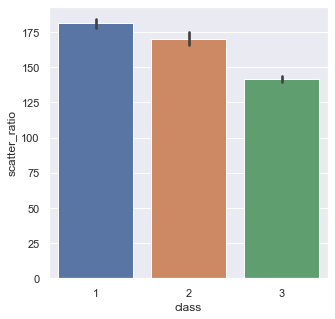

In [274]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='scatter_ratio',x='class',data=vehicledfOrig)
plt.show()

Vehcles with higher scatter_ratio are likely to be cars (class 1)

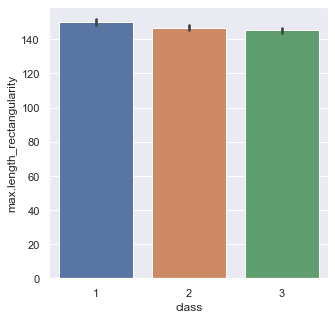

In [275]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='max.length_rectangularity',x='class',data=vehicledfOrig)
plt.show()

All 3 classes of vehicles (cars,buses,vans) have almost similar max.length_rectangularity on an average

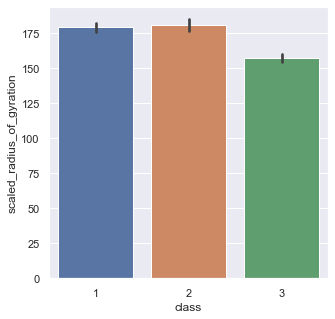

In [276]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='scaled_radius_of_gyration',x='class',data=vehicledfOrig)
plt.show()

Vehicles with higher scaled_radius_of_gyration are likely to be cars or buses

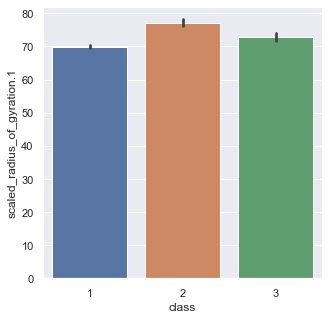

In [277]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='scaled_radius_of_gyration.1',x='class',data=vehicledfOrig)
plt.show()

Vehicles with higher scaled_radius_of_gyration.1 are likely to be buses

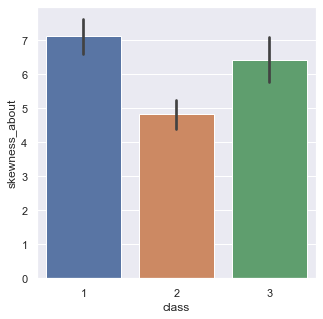

In [278]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='skewness_about',x='class',data=vehicledfOrig)
plt.show()

Buses on an average have lower skewness_about

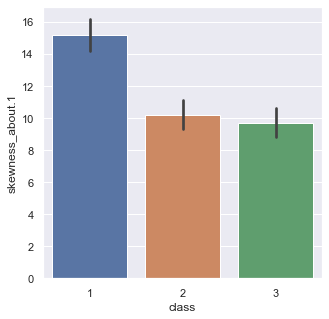

In [279]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='skewness_about.1',x='class',data=vehicledfOrig)
plt.show()

Vehicles with higher skewness_about.1 are likely to be cars

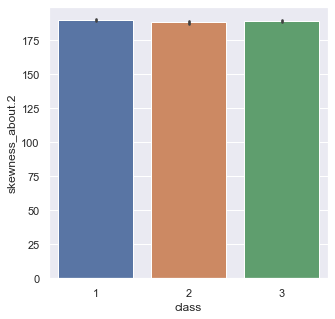

In [280]:
plt.figure(figsize=(5,5))  # setting the figure size
sns.barplot(y='skewness_about.2',x='class',data=vehicledfOrig)
plt.show()

All 3 classes of vehicles - cars, buses and vans have similar skewness_about.2 on an average

<b> Multivariate analysis

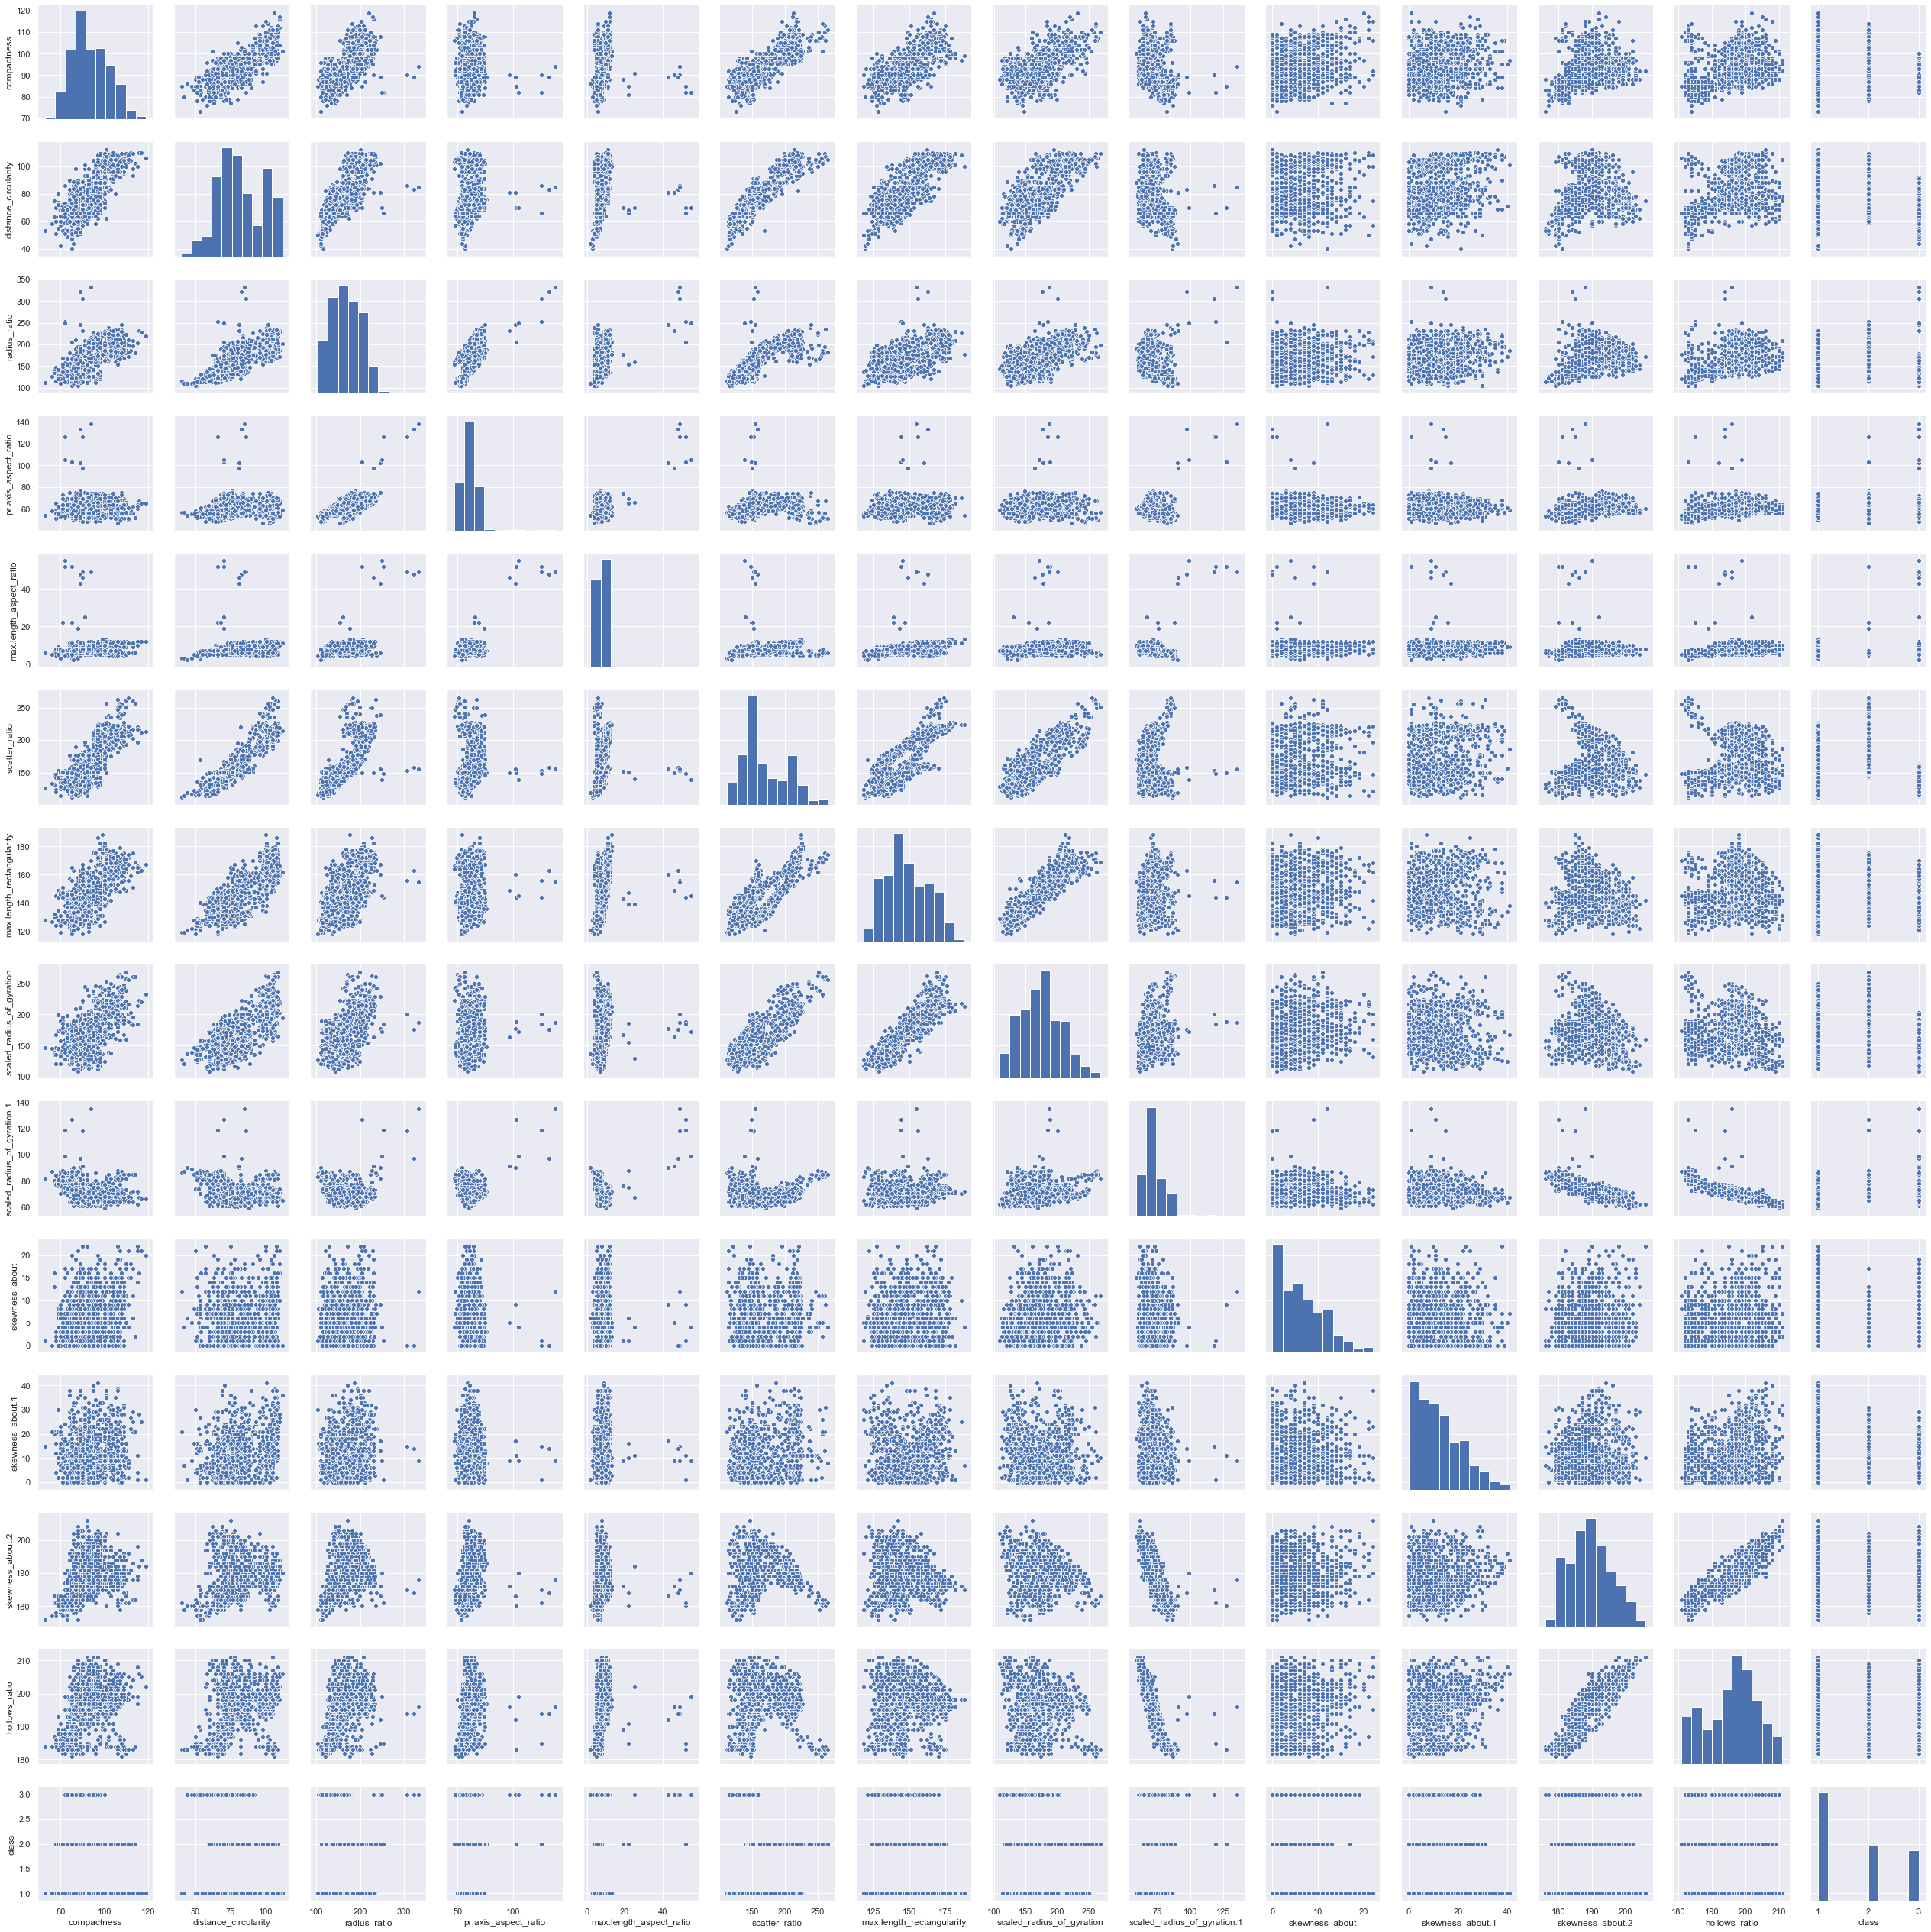

In [281]:
#plotting scatter plot between all variables
sns.pairplot(vehicledfOrig)
plt.show()

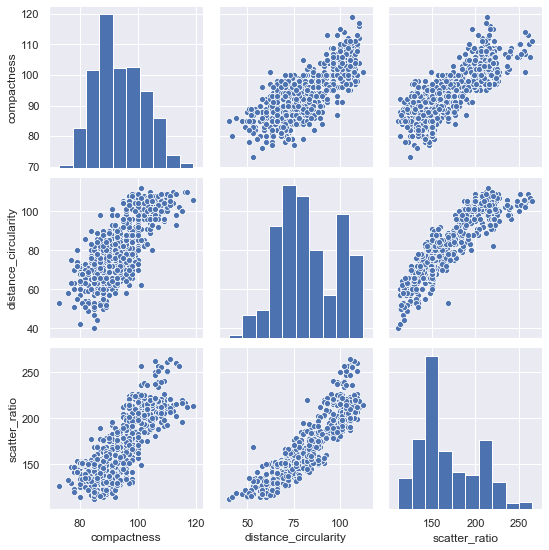

In [282]:
#Pair plot between different continuous variables
sns.pairplot(vehicledfOrig[['compactness','distance_circularity','scatter_ratio']])
plt.show()

'compactness','distance_circularity','scatter_ratio' are correlated

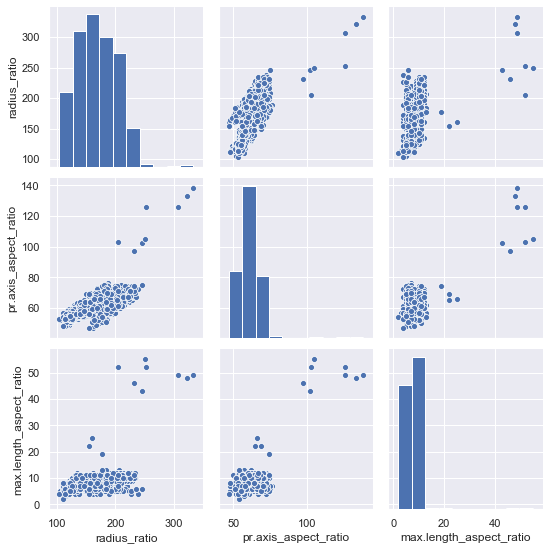

In [283]:
sns.pairplot(vehicledfOrig[['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio']])
plt.show()

'radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio' are not correlated

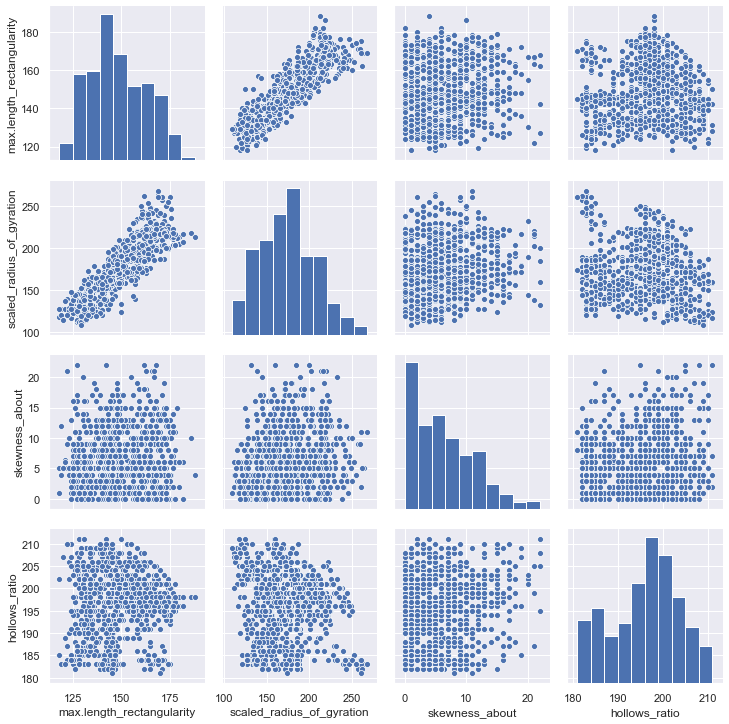

In [284]:
sns.pairplot(vehicledfOrig[['max.length_rectangularity','scaled_radius_of_gyration','skewness_about','hollows_ratio']])
plt.show()

max.length_rectangularity and scaled_radius_of_gyration are correlated

In [285]:
#Correlation between different variables
vehicledfOrig.corr().transpose()

compactness  distance_circularity  radius_ratio  \
compactness                     1.000000              0.789909      0.689840   
distance_circularity            0.789909              1.000000      0.767079   
radius_ratio                    0.689840              0.767079      1.000000   
pr.axis_aspect_ratio            0.091704              0.158397      0.663559   
max.length_aspect_ratio         0.148249              0.264550      0.450036   
scatter_ratio                   0.812235              0.904400      0.734228   
max.length_rectangularity       0.676143              0.774669      0.569205   
scaled_radius_of_gyration       0.585156              0.705953      0.536536   
scaled_radius_of_gyration.1    -0.250071             -0.225852     -0.180819   
skewness_about                  0.235687              0.113813      0.048720   
skewness_about.1                0.157387              0.265553      0.173832   
skewness_about.2                0.298526              0.145563      0.382129   
hollows_ratio                   0.365552              0.332095      0.471262   
class                          -0.297774             -0.428136     -0.402130   

                             pr.axis_aspect_ratio  max.length_aspect_ratio  \
compactness                              0.091704                 0.148249   
distance_circularity                     0.158397                 0.264550   
radius_ratio                             0.663559                 0.450036   
pr.axis_aspect_ratio                     1.000000                 0.648704   
max.length_aspect_ratio                  0.648704                 1.000000   
scatter_ratio                            0.103715                 0.165967   
max.length_rectangularity                0.127128                 0.305943   
scaled_radius_of_gyration                0.122111                 0.189704   
scaled_radius_of_gyration.1              0.152776                 0.295574   
skewness_about                          -0.058481                 0.015439   
skewness_about.1                        -0.032134                 0.043489   
skewness_about.2                         0.239849                -0.026180   
hollows_ratio                            0.267724                 0.143919   
class                                    0.038629                 0.036942   

                             scatter_ratio  max.length_rectangularity  \
compactness                       0.812235                   0.676143   
distance_circularity              0.904400                   0.774669   
radius_ratio                      0.734228                   0.569205   
pr.axis_aspect_ratio              0.103715                   0.127128   
max.length_aspect_ratio           0.165967                   0.305943   
scatter_ratio                     1.000000                   0.808356   
max.length_rectangularity         0.808356                   1.000000   
scaled_radius_of_gyration         0.799266                   0.866425   
scaled_radius_of_gyration.1      -0.027985                   0.041220   
skewness_about                    0.074308                   0.135745   
skewness_about.1                  0.213127                   0.001658   
skewness_about.2                  0.005167                  -0.104254   
hollows_ratio                     0.118448                   0.076770   
class                            -0.463979                  -0.140152   

                             scaled_radius_of_gyration  \
compactness                                   0.585156   
distance_circularity                          0.705953   
radius_ratio                                  0.536536   
pr.axis_aspect_ratio                          0.122111   
max.length_aspect_ratio                       0.189704   
scatter_ratio                                 0.799266   
max.length_rectangularity                     0.866425   
scaled_radius_of_gyration                     1.000000   
scaled_radius_of_gyration.1            

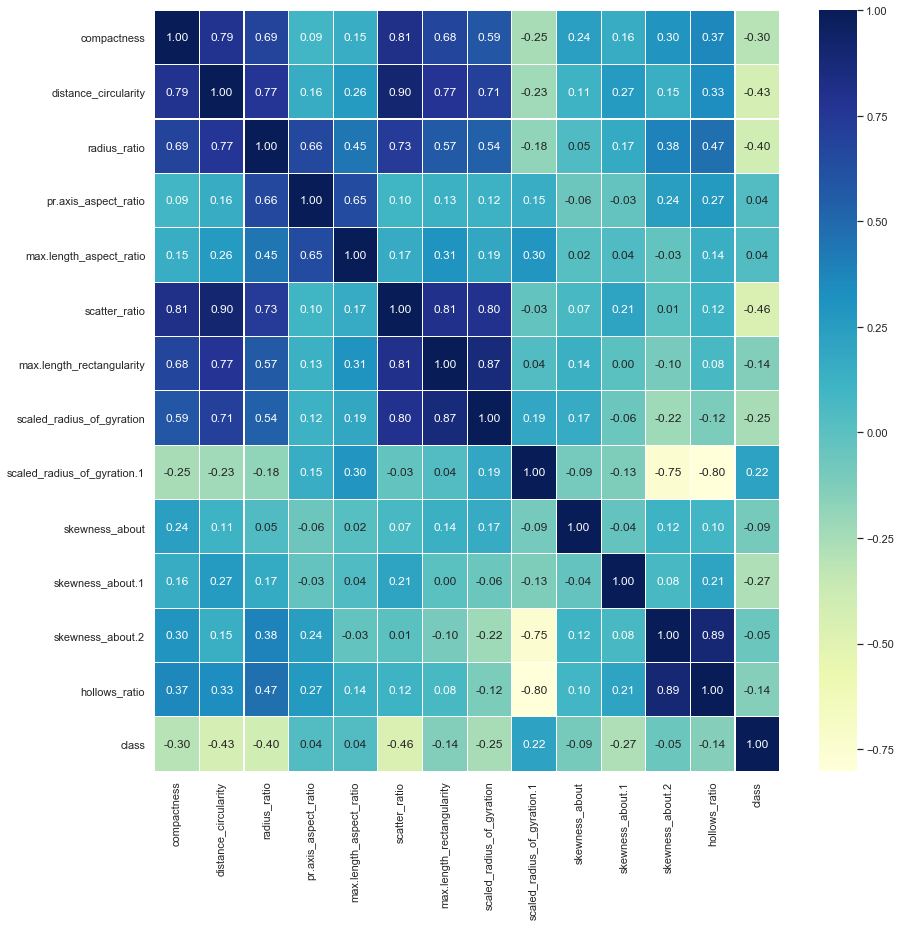

In [286]:
#Plotting heatmap for correlation
fig,ax = plt.subplots(figsize=(14, 14))   
sns.heatmap(vehicledfOrig.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="YlGnBu")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Classifier

<b>We will now train and fit SVM classifier on original dataset

In [287]:
vehicledfOrig.head()

compactness  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0           95                  83.0         178.0                  72.0   
1           91                  84.0         141.0                  57.0   
2          104                 106.0         209.0                  66.0   
3           93                  82.0         159.0                  63.0   
4           85                  70.0         205.0                 103.0   

   max.length_aspect_ratio  scatter_ratio  max.length_rectangularity  \
0                       10          162.0                        159   
1                        9          149.0                        143   
2                       10          207.0                        158   
3                        9          144.0                        143   
4                       52          149.0                        144   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                      184.0                         70.0             6.0   
1                      158.0                         72.0             9.0   
2                      220.0                         73.0            14.0   
3                      127.0                         63.0             6.0   
4                      188.0                        127.0             9.0   

   skewness_about.1  skewness_about.2  hollows_ratio  class  
0              16.0             187.0            197      3  
1              14.0             189.0            199      3  
2               9.0             188.0            196      1  
3              10.0             199.0            207      3  
4              11.0             180.0            183      2

In [288]:
X=vehicledfOrig.drop('class',axis=1)
y=vehicledfOrig['class']

In [289]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [290]:
#Fit the model
svmmodel = svm.SVC()
svmmodel.fit(X_train,y_train)

SVC()

In [291]:
train_score=svmmodel.score(X_train, y_train)
y_pred = svmmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1score=round(f1_score(y_test, y_pred,average='weighted'),2)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')

print("Train Accuracy: {0:.4f}".format(train_score))
print("Model Accuracy: {0:.4f}".format(accuracy))
print("Model F1 score: {0:.4f}".format(f1score))
print("Model Precision: {0:.4f}".format(precision))
print("Model Recall: {0:.4f}".format(recall))

Train Accuracy: 0.7213
Model Accuracy: 0.7126
Model F1 score: 0.7000
Model Precision: 0.7168
Model Recall: 0.7126


In [292]:
#Adding performance metrics to a dataframe for comparison
resultsDf = pd.DataFrame({'Data':['Data without Dimensionality Reduction'],  'Train Accuracy': train_score,
                          'Model Accuracy': accuracy,'F1 score': f1score, 'Precision': precision,'Recall': recall})
resultsDf = resultsDf[['Data', 'Train Accuracy','Model Accuracy','F1 score','Precision','Recall']]


In [293]:
resultsDf

Data  Train Accuracy  Model Accuracy  \
0  Data without Dimensionality Reduction        0.721284        0.712598   

   F1 score  Precision    Recall  
0       0.7   0.716829  0.712598

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4. Dimensional reduction

<b> We will now perform dimensionality reduction using PCA

In [294]:
vehicledf.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      3  
1             189.0            199      3  
2             188.0            196      1  
3             199.0            207      3  
4             180.0            183      2

In [295]:
#Separating independent variables and target variable
X = vehicledf.drop(['class'],axis=1)
y = vehicledf['class']

In [296]:
#Scaling the data
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [297]:
#Creating Covariance matrix
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [298]:
#Applying PCA
pca = PCA()
pca.fit(XScaled)

PCA()

In [299]:
#Printing Eigen values
print(pca.explained_variance_)

[9.40828822e+00 3.01605477e+00 1.90347881e+00 1.18027268e+00
 9.17174067e-01 5.39279825e-01 3.58566463e-01 2.21661730e-01
 1.60036194e-01 9.17140864e-02 6.65751851e-02 4.59556829e-02
 3.54023825e-02 2.67096104e-02 2.03690624e-02 1.74414127e-02
 9.23357029e-03 3.08801865e-03]


In [300]:
#Printing the Eigen vectors
print(pca.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [301]:
#Analyzing percentage of variation explained by each eigen vector
print(pca.explained_variance_ratio_)

[5.22064851e-01 1.67360538e-01 1.05623824e-01 6.54931979e-02
 5.08938854e-02 2.99245766e-02 1.98968125e-02 1.22999843e-02
 8.88039031e-03 5.08920430e-03 3.69424950e-03 2.55007565e-03
 1.96447421e-03 1.48211326e-03 1.13027697e-03 9.67822019e-04
 5.12369772e-04 1.71353806e-04]


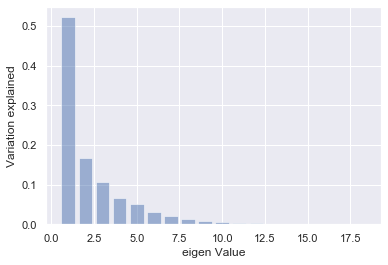

In [302]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

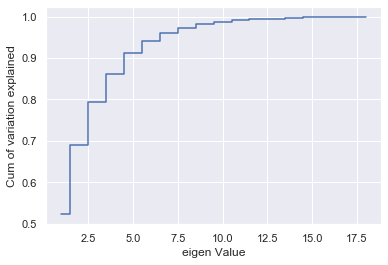

In [303]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

As we can see that 6 eigen vectors collectively can show around 95% of variation in original data. Therefore we can apply dimensionality reduction with 6 variables.

In [304]:
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

Therefore, we reduced 18 features to 6 Principal components.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5. Classifier

<b> Let us now apply SVM classifier to dimensionality reduced attributed

In [305]:
# Split X and y into training and test set in 70:30 ratio

X_train1, X_test1, y_train1, y_test1 = train_test_split(Xpca6, y, test_size=0.30, random_state=1)

In [306]:
#Train and fit the model
svmmodel1 = svm.SVC()
svmmodel1.fit(X_train1,y_train1)

SVC()

In [307]:
train_score=svmmodel1.score(X_train1, y_train1)
y_pred = svmmodel1.predict(X_test1)
accuracy = accuracy_score(y_test1, y_pred)
f1score=round(f1_score(y_test1, y_pred,average='weighted'),2)
precision=precision_score(y_test1,y_pred,average='weighted')
recall=recall_score(y_test1,y_pred,average='weighted')

In [308]:
print("Train Accuracy: {0:.4f}".format(train_score))
print("Model Accuracy: {0:.4f}".format(accuracy))
print("Model F1 score: {0:.4f}".format(f1score))
print("Model Precision: {0:.4f}".format(precision))
print("Model Recall: {0:.4f}".format(recall))

Train Accuracy: 0.8953
Model Accuracy: 0.8740
Model F1 score: 0.8700
Model Precision: 0.8740
Model Recall: 0.8740


In [309]:
#Adding Performance metrics to the list for comparison
tempResultsDf = pd.DataFrame({'Data':['Data after PCA'],  'Train Accuracy': train_score,
                          'Model Accuracy': accuracy,'F1 score': f1score, 'Precision': precision,'Recall': recall})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Data', 'Train Accuracy','Model Accuracy','F1 score','Precision','Recall']]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6. Conclusion

<b> Let's compare results from model application to dataset before and after applying PCA

In [311]:
#Printing the comparison matrix
resultsDf

Data  Train Accuracy  Model Accuracy  \
0  Data without Dimensionality Reduction        0.721284        0.712598   
0                         Data after PCA        0.895270        0.874016   

   F1 score  Precision    Recall  
0      0.70   0.716829  0.712598  
0      0.87   0.873994  0.874016

<b> As seen from above matrix, performance of model greatly improved after application of PCA. Overall accuracy of model improved from 71% to 87%. Also, F1 score increased from 0.7to 0.87. This indicates that PCA applied model is accurately able to tag vehicles to correct classes.
    
PCA is able to improve accuracy by reducing dimensionality through feature extraction. As we have seeen earlier, there were several features which were high correlated. PCA deals with such variables by removing need to explicitly drop them.

### Part 4 - Sports Management

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. EDA and visualisation

In [129]:
#Importing dataset
playerdf=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [130]:
playerdf.head(10)

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
6        NaN    NaN    NaN     NaN    NaN    NaN  NaN
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0
8        NaN    NaN    NaN     NaN    NaN    NaN  NaN
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

As we can see above, there seems to be several records where all attributes have a value NaN. We can drop such records.

In [131]:
playerdf.shape

(180, 7)

In [132]:
playerdf[playerdf.isnull().all(1)]

Name  Runs  Ave  SR  Fours  Sixes  HF
0    NaN   NaN  NaN NaN    NaN    NaN NaN
2    NaN   NaN  NaN NaN    NaN    NaN NaN
4    NaN   NaN  NaN NaN    NaN    NaN NaN
6    NaN   NaN  NaN NaN    NaN    NaN NaN
8    NaN   NaN  NaN NaN    NaN    NaN NaN
..   ...   ...  ...  ..    ...    ...  ..
170  NaN   NaN  NaN NaN    NaN    NaN NaN
172  NaN   NaN  NaN NaN    NaN    NaN NaN
174  NaN   NaN  NaN NaN    NaN    NaN NaN
176  NaN   NaN  NaN NaN    NaN    NaN NaN
178  NaN   NaN  NaN NaN    NaN    NaN NaN

[90 rows x 7 columns]

In [133]:
#Dropping all records where every single attribute is missing
idx = playerdf.index[playerdf.isnull().all(1)]
playerdf=playerdf.drop(idx)

In [134]:
playerdf

Name   Runs    Ave      SR  Fours  Sixes   HF
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
..           ...    ...    ...     ...    ...    ...  ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 7 columns]

In [135]:
#Let us check if there are other columns with null values
playerdf.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [136]:
#Describe the data
playerdf.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

In [137]:
#Checking datatypes
playerdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


Let's separate out numerical attributes for doing EDA

In [138]:
playerdfAttr=playerdf.iloc[:,1:]

In [139]:
playerdfAttr.head()

Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0

In [140]:
#Plotting scatter plot between all the attributes
import plotly.express as px
fig = px.scatter(data_frame=playerdfAttr)
fig.show()

In [141]:
#Plot between runs scored and average
fig = px.scatter(playerdfAttr,x='Runs', y='Ave',size='Ave')
fig.show()

As seen above, many players who have scored more runs also have an high average. But this is not always the case.

In [142]:
#Plot between average of each player, with color indicating number of Half Centuries scored
fig = px.bar(playerdf, x="Name", y="Ave", color="HF", title="Average of Each Player")
fig.show()

In [143]:
#Plot showing Strike Rate of each player, with color indicating number of foures
fig = px.bar(playerdf, x="Name", y="SR",color='Fours', title="Strike Rate of Each Player - with Number of Fours")
fig.show()

In [144]:
#Plot showing Strike Rate of each player, with color indicating number of Sixes
fig = px.bar(playerdf, x="Name", y="SR",color='Sixes', title="Strike Rate of Each Player - with Number of Sixes")
fig.show()

In [145]:
#Plot between SR and average
fig = px.scatter(playerdfAttr,x='SR', y='Ave',size='Ave')
fig.show()

As seen above, a high SR doesn't necessarily indicates a high average

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Building model

In [146]:
#Scaling the data
playerdfScaled=playerdfAttr.apply(zscore)
playerdfScaled.head()

Runs       Ave        SR     Fours     Sixes        HF
1  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533

Let us use pair plot to get an insight into potential clusters present in data

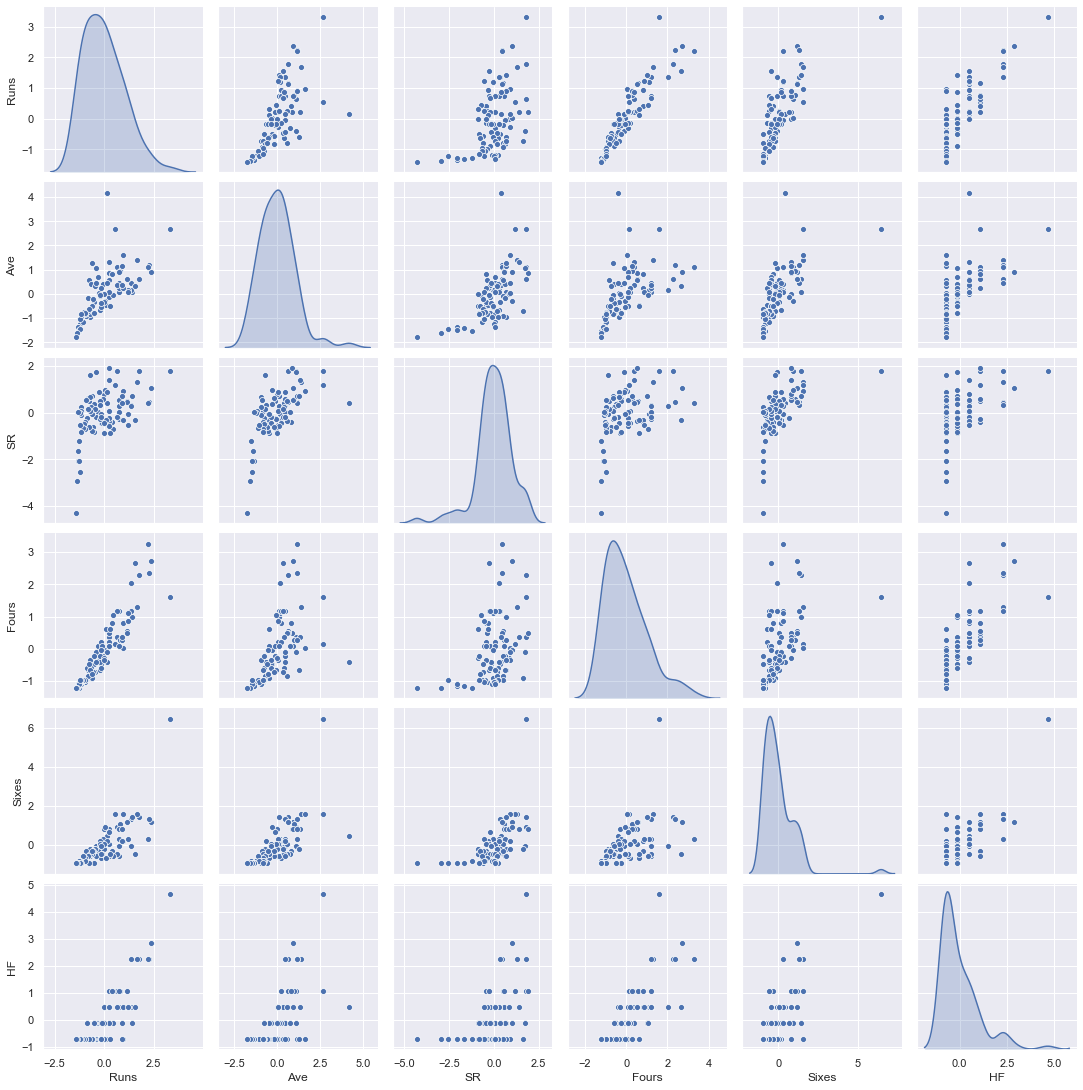

In [147]:
sns.pairplot(playerdfScaled, diag_kind='kde') 
plt.show()

Pair plot indicates that there could be around 2 or 3 clusters

We will use elbow method to further ascertain number of groups

In [149]:
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

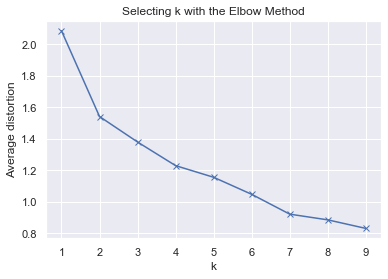

In [150]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]
cluster=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(playerdfScaled)
    prediction=model.predict(playerdfScaled)
    meanDistortions.append(sum(np.min(cdist(playerdfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / playerdfScaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

As seen from figure above, there is clear bend at K=2.This indicates presence of 2 clusters.

In [151]:
# Assigning groups to data records
final_model=KMeans(2)
final_model.fit(playerdfScaled)
prediction=final_model.predict(playerdfScaled)

#Append the prediction 
playerdf["GROUP"] = prediction
playerdfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
playerdf.head()

Groups Assigned : 



Name   Runs    Ave      SR  Fours  Sixes   HF  GROUP
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0      1
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0      1
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0      1
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0      1
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0      1

<b>Analyze the distribution of the data among the two groups

In [152]:
playerClust = playerdf.groupby(['GROUP'])
playerClust.mean()

Runs        Ave          SR      Fours      Sixes        HF
GROUP                                                                   
0      122.745455  17.582000  110.481455  10.309091   3.636364  0.218182
1      372.657143  35.962286  132.808286  34.685714  13.771429  2.714286

Above distribution indicates that Group 0 consists of high performing players with higher average runs, average, average strike rate, average number of fours and sixes and average number of half centuries

C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\z0046zxj\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when cr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D6BBEB248>,
      dtype=object)

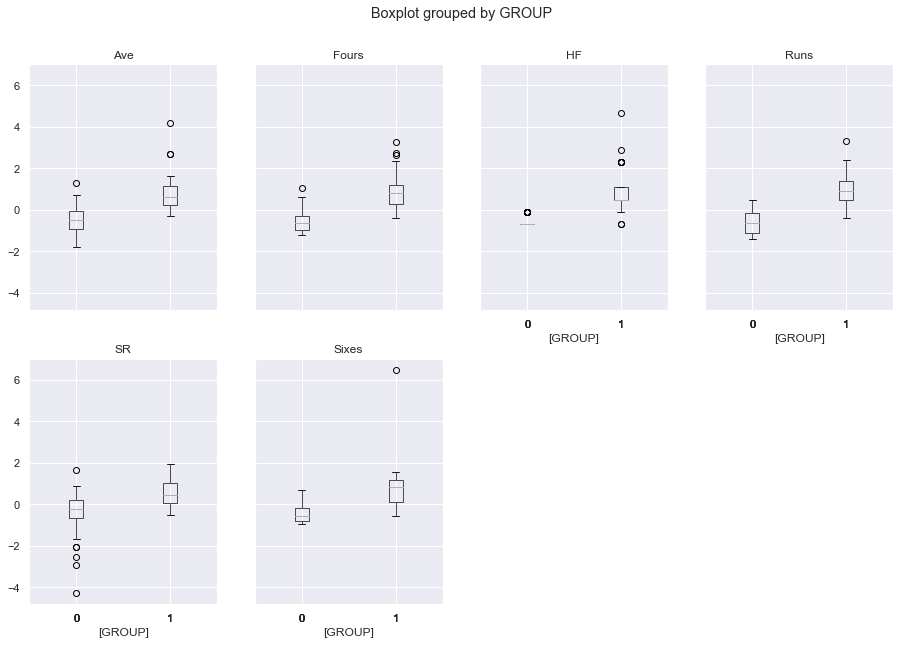

In [153]:
playerdfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

Box plot indicates that both the groups do contain outliers which potentially could have impacted different attributes

In [154]:
playerdf

Name   Runs    Ave      SR  Fours  Sixes   HF  GROUP
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0      1
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0      1
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0      1
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0      1
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0      1
..           ...    ...    ...     ...    ...    ...  ...    ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0      0
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0      0
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0      0
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0      0
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0      0

[90 rows x 8 columns]

<b> We will now do PCA analysis to find Eigen values and Eigen vectors

In [155]:
#Creating Covariance matrix
covMatrix = np.cov(playerdfScaled,rowvar=False)
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142
  0.38652787]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842
  0.32615547]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784
  0.22808683]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429
  0.35921814]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221
  0.30611632]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596
  0.35722828]
 [0.38652787 0.32615547 0.22808683 0.35921814 0.30611632 0.35722828
  0.24032459]]


In [156]:
#Applying PCA
pca = PCA()
pca.fit(playerdfScaled)

PCA()

In [157]:
#Eigen values
print(pca.explained_variance_)

[4.45778426 0.83951027 0.41789045 0.3313275  0.16586899 0.07845943
 0.01689942]


In [158]:
#Eigen vectors
print(pca.components_)

[[ 0.4508496   0.39092487  0.3177324   0.40004952  0.40835113  0.42503501
   0.18845024]
 [ 0.25943084 -0.33374404 -0.70097479  0.46785971 -0.18784964  0.26792269
   0.06310416]
 [-0.10177963 -0.00575003 -0.44324167 -0.49790957  0.67660068  0.28963085
  -0.05963402]
 [-0.01882018  0.83938759 -0.44009641 -0.0560074  -0.24032317 -0.17966138
   0.0906596 ]
 [ 0.46253646 -0.09297433 -0.1195156   0.10410369  0.3934311  -0.77165632
  -0.04530707]
 [ 0.05056103  0.13995932  0.00487502  0.15834308  0.00318053  0.09272288
  -0.97167434]
 [ 0.70867524 -0.05436214  0.05678641 -0.57801972 -0.35723944  0.16537054
  -0.05025171]]


In [159]:
#Analyzing percentage of variation explained by each eigen vector
print(pca.explained_variance_ratio_)

[0.70671652 0.13309208 0.06625042 0.05252713 0.0262961  0.0124386
 0.00267916]


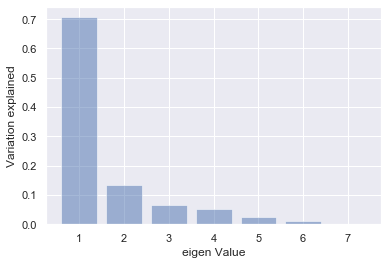

In [160]:
plt.bar(list(range(1,8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

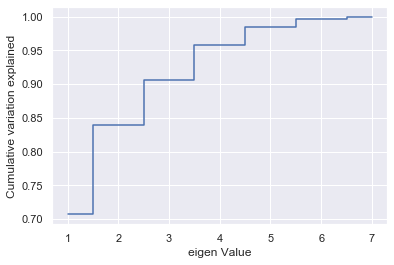

In [161]:
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative variation explained')
plt.xlabel('eigen Value')
plt.show()

<b>As we can see that 4 eigen vectors collectively can show around 95% of variation in original data. Therefore we can apply dimensionality reduction with 4 variables.

In [162]:
pca4 = PCA(n_components=4)
pca4.fit(playerdfScaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(playerdfScaled)

[[ 0.4508496   0.39092487  0.3177324   0.40004952  0.40835113  0.42503501
   0.18845024]
 [ 0.25943084 -0.33374404 -0.70097479  0.46785971 -0.18784964  0.26792269
   0.06310416]
 [-0.10177963 -0.00575003 -0.44324167 -0.49790957  0.67660068  0.28963085
  -0.05963402]
 [-0.01882018  0.83938759 -0.44009641 -0.0560074  -0.24032317 -0.17966138
   0.0906596 ]]
[0.70671652 0.13309208 0.06625042 0.05252713]


<b> We will create a function to find rank of players. For this we will make use of Eigen values and Eigen Vectors. Since there are 4 Eigen values, we will select the one with maximum value. Then we will use corresponding Eigen vectors to calculate score for each player.

Score = 0.4508496**Runs + 0.39092487**Ave + 0.40004952**SR + 0.40835113**Fours + 0.42503501**Sixes + 0.18845024**HF
    
Scores will then be used to rank players


In [163]:
#Define a function to find ranking of players in a dataframe
def findRankings(df,values,vector):
    
    #finding index of maximum Eigen value
    max_index = np.argmax(values)
    #assigning corresponding eigenvectors to an array
    eigenvector=vector[max_index]
    
    #List to store scores
    scores = []
        
    #Iterate through each row of dataframe
    for index, row in df.iterrows():
        score = 0
        for idx in range(0,len(eigenvector)):
            #calculate score by taking product of each attribute by corresponding eigen vector
            score = score + float(row[idx])*float(eigenvector[idx])

        scores.append(score)   
    
#Adding a Score and Rank column to the dataset
    df['Score'] = pd.Series(scores, index=df.index)
    
    df['Rank']=df['Score'].rank(method='first',ascending=False)

#Sorting players by Rank
    df.sort_values('Rank',inplace=True)
    
    return df

In [164]:
#Invoking the function with 3 parameters - datarame, Eigen values, Eigen vector
playerdfScaled=findRankings(playerdfScaled,pca4.explained_variance_,pca4.components_)

In [165]:
playerdf['Score']=playerdfScaled['Score']
playerdf['Rank']=playerdfScaled['Rank']

In [166]:
playerdf.sort_values('Rank',inplace=True)
playerdf.reset_index(drop=True,inplace=True)

<b> List of top 20 players

In [167]:
playerdf.head(20)

Name   Runs    Ave      SR  Fours  Sixes   HF  GROUP     Score  \
0         CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0      1  8.546980   
1        G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0      1  4.727800   
2         V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0      1  4.257060   
3         S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0      1  4.238440   
4        AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0      1  4.147455   
5         CL White  479.0  43.54  149.68   41.0   20.0  5.0      1  4.017711   
6        RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0      1  3.056540   
7     KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0      1  3.012924   
8   AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0      1  2.471131   
9     F du Plessis  398.0  33.16  130.92   29.0   17.0  3.0      1  2.275147   
10       JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0      1  2.231440   
11       DA Warner  256.0  36.57  164.10   28.0   14.0  3.0      1  2.231204   
12         OA Shah  340.0  37.77  132.81   24.0   16.0  3.0      1  2.091480   
13        SK Raina  441.0  25.94  135.69   36.0   19.0  1.0      1  2.024068   
14        R Dravid  462.0  28.87  112.13   63.0    4.0  2.0      1  1.996974   
15       DJ Hussey  396.0  33.00  129.83   28.0   17.0  2.0      1  1.972364   
16   Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0      1  1.956132   
17       SR Watson  255.0  42.50  151.78   26.0   14.0  2.0      1  1.930902   
18        DJ Bravo  371.0  46.37  140.53   20.0   20.0  0.0      1  1.881766   
19       AT Rayudu  333.0  37.00  132.14   21.0   14.0  2.0      1  1.610551   

    Rank  
0    1.0  
1    2.0  
2    3.0  
3    4.0  
4    5.0  
5    6.0  
6    7.0  
7    8.0  
8    9.0  
9   10.0  
10  11.0  
11  12.0  
12  13.0  
13  14.0  
14  15.0  
15  16.0  
16  17.0  
17  18.0  
18  19.0  
19  20.0

## Part 5

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. List down all possible dimensionality reduction techniques that can be implemented using python.

<b> Dimensionality Reduction </b> is a technique to reduce number of input variables. This is very useful technique to work with datasets having large number of features. It also helps to reduce multi collinearity issues, i.e. a dataset where features are strongly correlated and cause redundancy. It also saves space and computation time.

<b> Different Dimensionality Reduction techniques </b>

<b> <i> 1. Missing Value Ratio </b> </i>
This method involves setting a threshold value for each variable, and if the percentage of missing values in any variable is more than that threshold, we will drop the variable. Typically if 50% of values are missing for a variable, it is dropped.

<b> <i> 2. Low Variance Filter </b> </i>
In this method, we observe variance for values of each variable.Then drop the variables having low variance as compared to other variables in our dataset. This is because variables with low variance will not affect target variable.

<b> <i> 3. High correlation Filter </b> </i>
In this method, we calculate correlation between different numerical variables. If two variables show a high correlation (typically >= 0.95), we drop one of those. However, those variables which show a high correlation with the target variable should not be dropped.

<b> <i> 4. Random Forest </b> </i>
In this method, we calculate Feature importance of different features using in-built method, and then drop the features which have low importance.

<b> <i> 5. Backward Feature Elimination </b> </i>
We first take all the n variables present in our dataset and train the model using them
We then calculate the performance of the model
Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
Repeat this process until no variable can be dropped

<b> <i> 6. Forward Feature Selection </b> </i>
This is the opposite process of Backward Feature Elimination
We start with a single feature. Essentially, we train the model n number of times using each feature separately
The variable giving the best performance is selected as the starting variable
Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
We repeat this process until no significant improvement is seen in the model’s performance

<b> <i> 7. Principal Component Analysis </b> </i>
PCA is a feature extraction technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components.
Steps -
a) Standardization - Scale the input variables
b) Generate Covariance Matrix for all variables
c) Compute Eigen values and Eigen vectors of the Covariance Matrix to identify Principal Components
d) Sort the Eigen pairs in descending order of Eigen values and select the one with the largest value. This is the first principal component that covers the maximum information from the dataset.

<b> <i> 8. Factor Analysis </b> </i>
In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor. These factors are small in number as compared to the original dimensions of the data. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Implementation of Dimensionality Reduction on images

In [168]:
import imageio

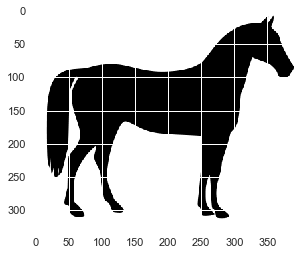

In [169]:
# Loading the sample image
img=imageio.imread('imageio:horse.png') 
plt.imshow(img)

In [170]:
#Shape of original image
img.shape

(328, 400, 4)

Our image is in the form of 328 rows each containing 400 pixels which have 4 channels(CMYK). We have to resize the image so that it is in the format required for PCA input. As 400*4=1600, we resize the image to (328,1600)

In [171]:
img_r = np.reshape(img, (328, 1600)) 
print(img_r.shape) 

(328, 1600)


<b> Applying PCA with 10 Pricipal Components

In [172]:
pca = PCA(10).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape) 
print(np.sum(pca.explained_variance_ratio_) )

(328, 10)
0.9354219237849798


With these 10 components we are able to express 93.5% of the variance.

In [173]:
#Inverse transforming the PCA output and reshaping for visualization using imshow:
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (328, 400 ,4)) 
print(temp.shape) 

(328, 1600)
(328, 400, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


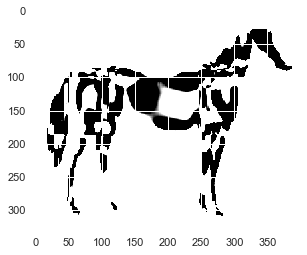

In [174]:
plt.imshow(temp)

<b> Applying PCA with 20 Pricipal Components

In [175]:
pca = PCA(20).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape) 
print(np.sum(pca.explained_variance_ratio_) )

(328, 20)
0.971981196446822


With these 20 components we are able to express 97.2% of the variance.

In [176]:
#Inverse transforming the PCA output and reshaping for visualization using imshow:
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (328, 400 ,4)) 
print(temp.shape) 

(328, 1600)
(328, 400, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


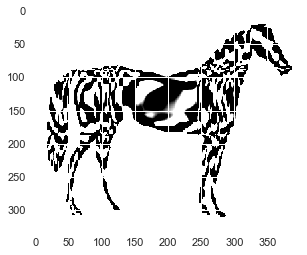

In [177]:
plt.imshow(temp)

<b> Applying PCA with 40 Pricipal Components

In [178]:
pca = PCA(40).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape) 
print(np.sum(pca.explained_variance_ratio_) )

(328, 40)
0.9899302403160205


With these 40 components we are able to express 98.9% of the variance.

In [179]:
#Inverse transforming the PCA output and reshaping for visualization using imshow:
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (328, 400 ,4)) 
print(temp.shape) 

(328, 1600)
(328, 400, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


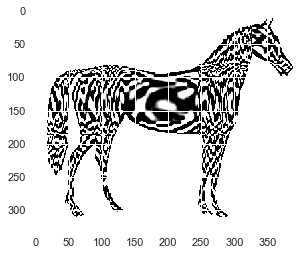

In [180]:
plt.imshow(temp)

<b> Thus, with help of PCA we were able to reduce Features from 400 to 40, and still able to achieve 98.9% of variance. Image was compressed without significant loss of information.